<a href="https://colab.research.google.com/github/Herdvair/Final_project_DS/blob/main/Final_Project_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [61]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime

In [62]:
#import data di kaggle
import kagglehub

# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats
from scipy.stats import chisquare, chi2_contingency

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import decision tree model as surrogate model
from sklearn.tree import DecisionTreeClassifier
# import tree module
from sklearn import tree
from lightgbm import LGBMClassifier
# import xgboost classifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV

from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay, fbeta_score

# from imblearn.over_sampling import SMOTE

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load Dataset

In [63]:
df = pd.read_csv("/content/alzheimers_disease_data.csv")

In [64]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [65]:
df_eda = df.copy()

# Data Understanding

In [66]:
def data_understanding (df_eda : object) -> object:
    print('\n ===== Shape =====')
    print(df_eda.shape)

    print('\n ===== Info =====')
    df_eda.info()

    print('\n ===== Describe =====')
    print(df_eda.describe())

    print('\n ===== Missing Value =====')
    print(df_eda.isna().sum())

    print('\n ===== Duplicated Value =====')
    print(len(df_eda.drop_duplicates())/len(df_eda))

In [67]:
data_understanding(df_eda)


 ===== Shape =====
(2149, 35)

 ===== Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13

Dataset Overview :

- Ukuran dimensi data 2194 baris data dan 35 kolom
- Tipe data bervariasi yaitu integer, float dan object
- Tidak ada missing value
- Tidak ada data duplikat

In [68]:
df_eda = df_eda.drop(columns=['Ethnicity', 'DietQuality', 'PatientID', 'SystolicBP', 'DiastolicBP','DoctorInCharge',
                         'CholesterolTotal','CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides' ])

Dilakukan seleksi kolom yang berpotensi memiliki pengaruh terhadap diagnosis Alzheimer, dan kolom yang akan dihapus adalah Ethnicity, Diet Quality, PatientID, SystolicBP, DiastolicBP, Doctor in Charge, Cholesterol Total, Cholesterol LDL, Cholesterol HDL, Cholesterol Triglycerides.

In [69]:
num_col = df_eda.select_dtypes(include=['int64','float64']).columns


def check_plot(df_eda):

    for i in num_col:

    # tentukan ukuran gambar
        plt.figure(figsize=(20, 4))

        # histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_eda[i], bins=30)
        plt.title('Histogram')

       # box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df_eda[i])
        plt.title('Boxplot')

        plt.show()


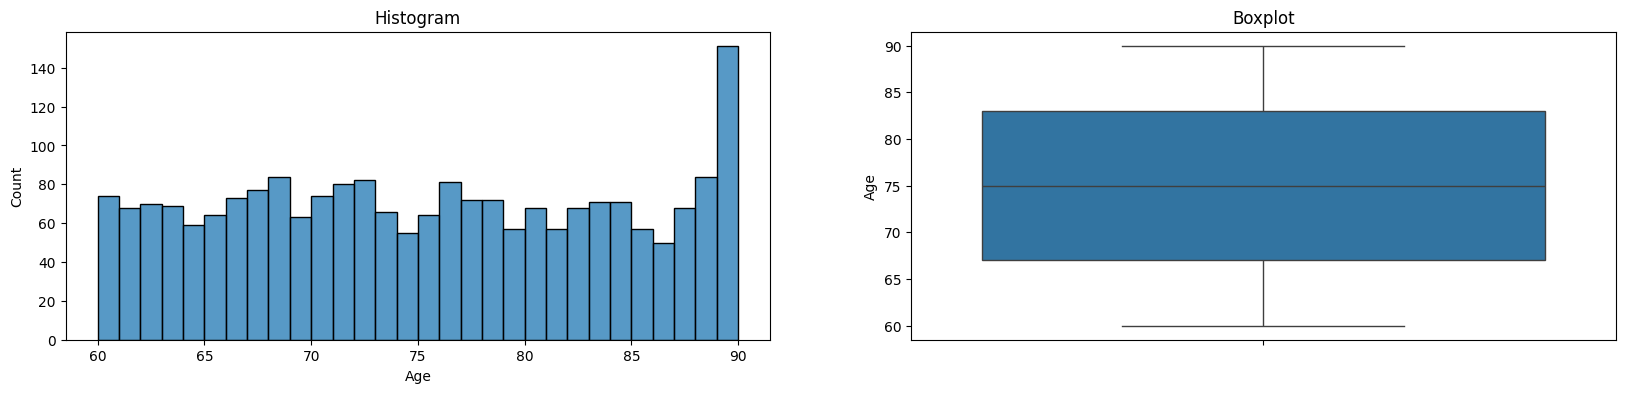

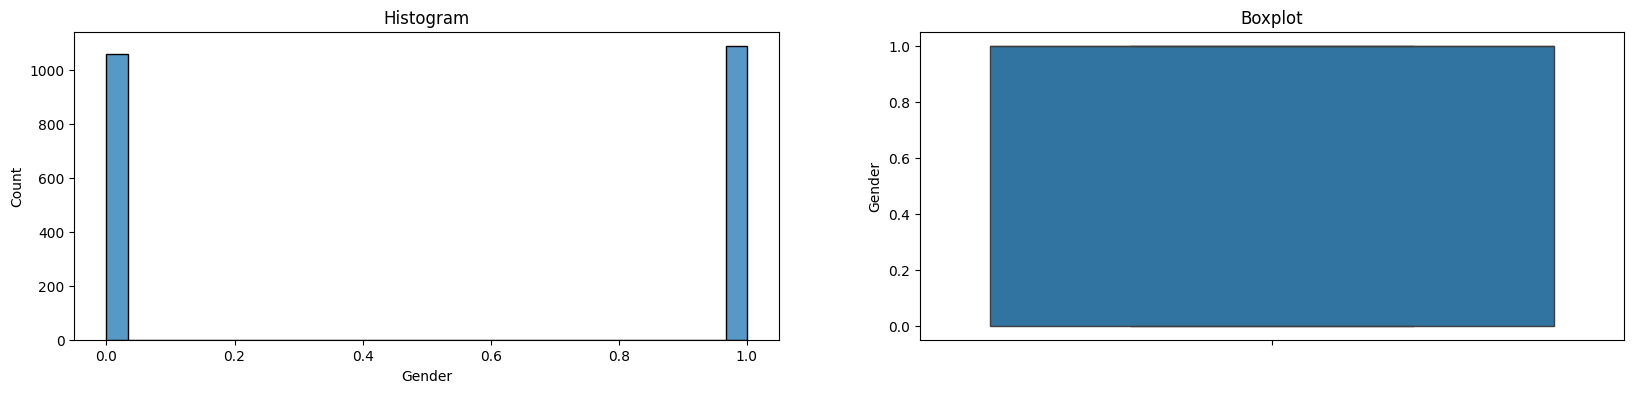

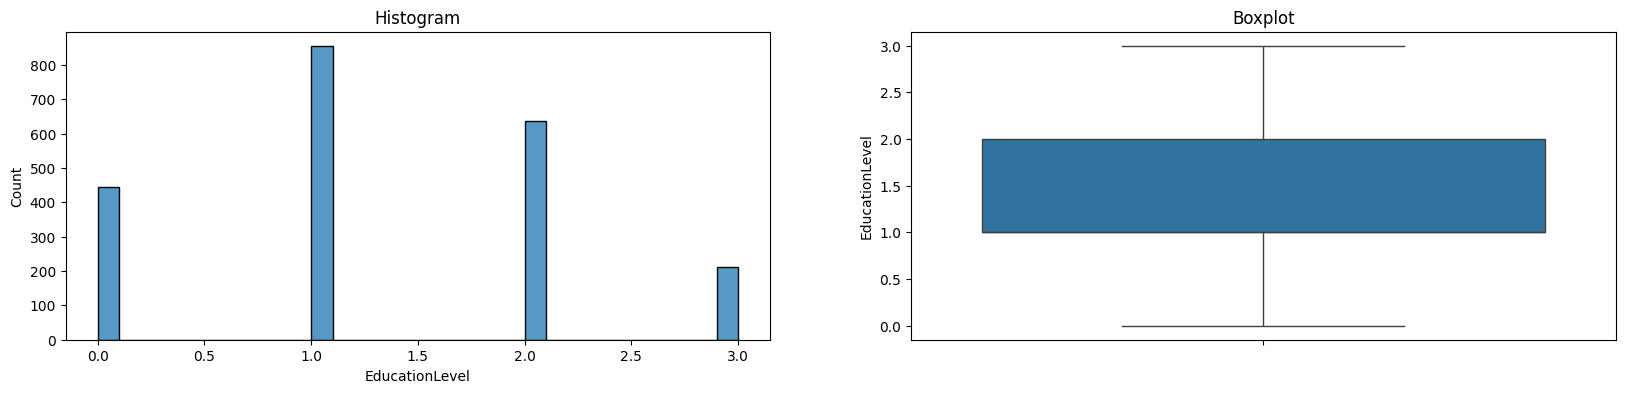

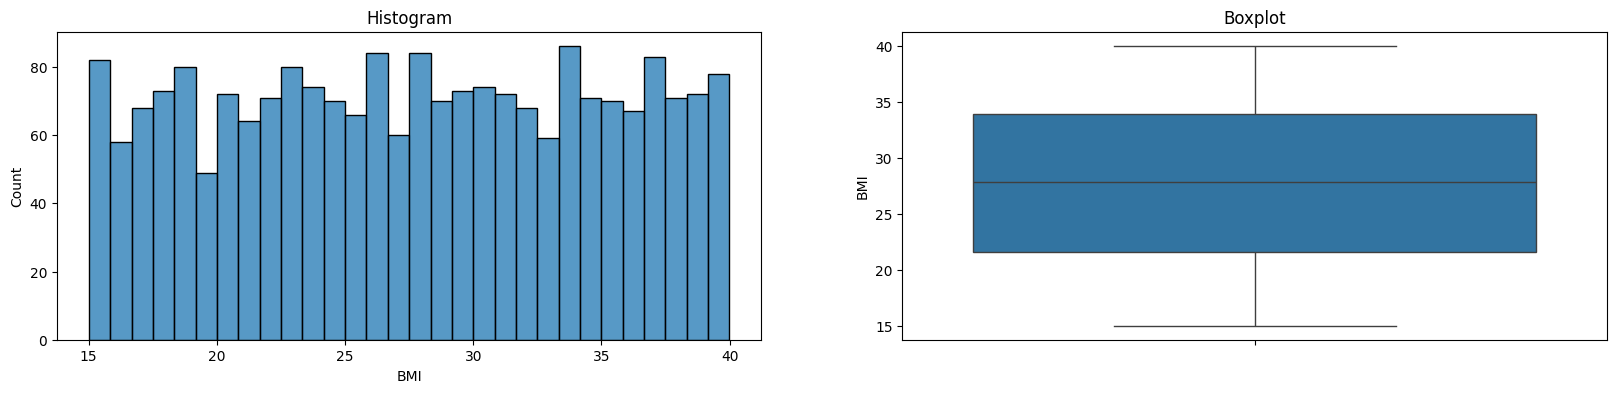

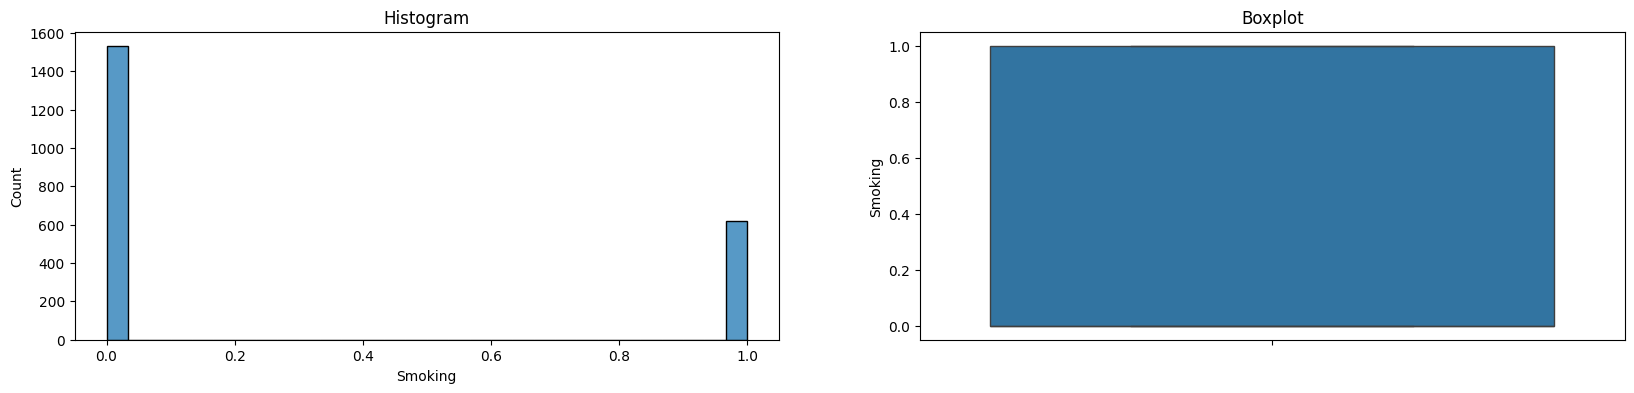

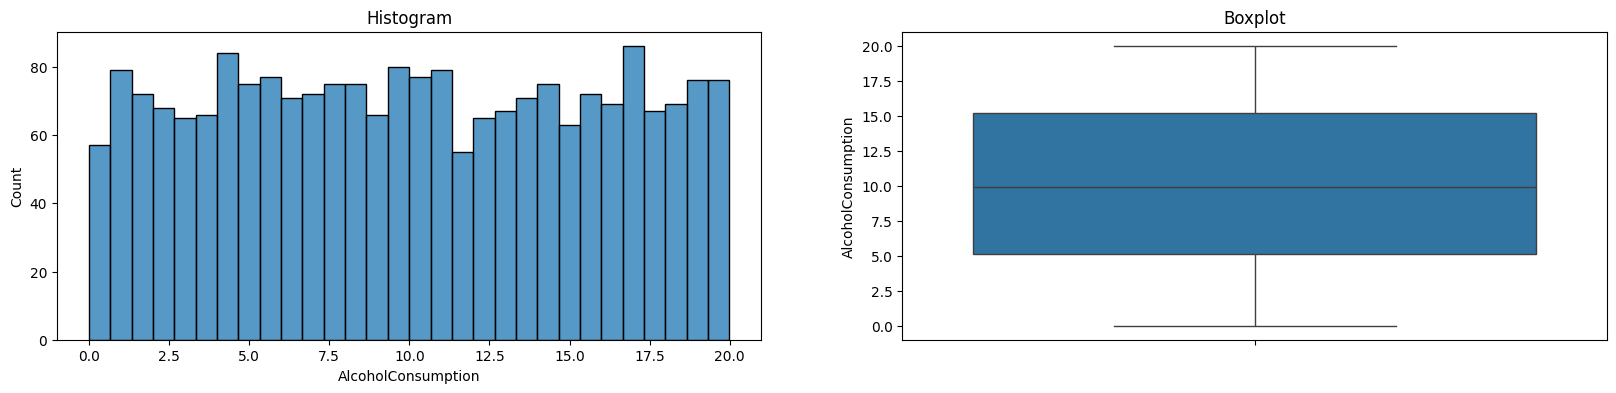

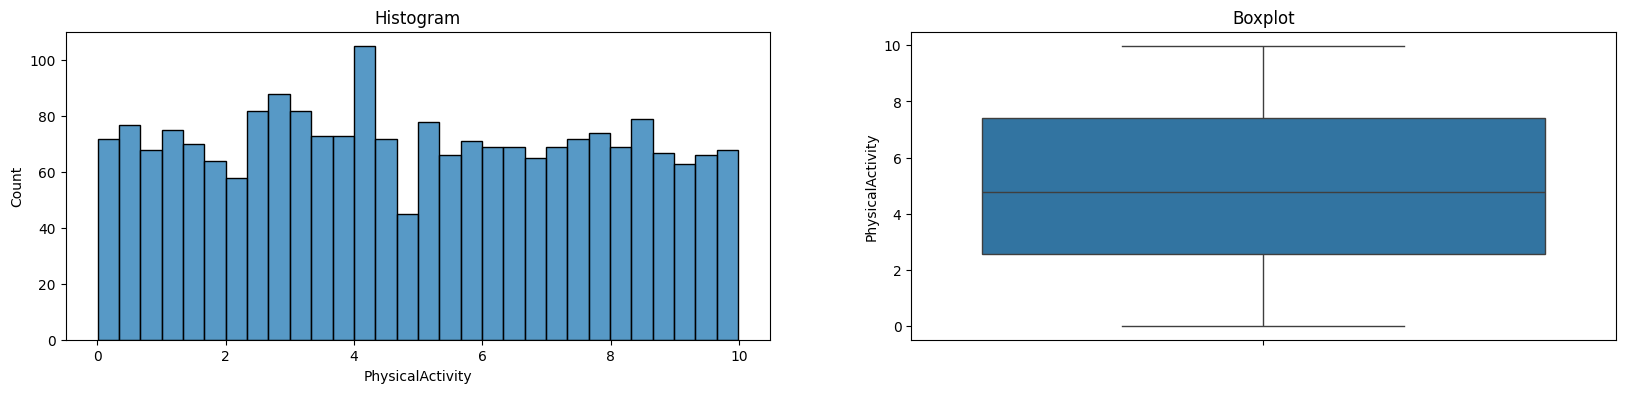

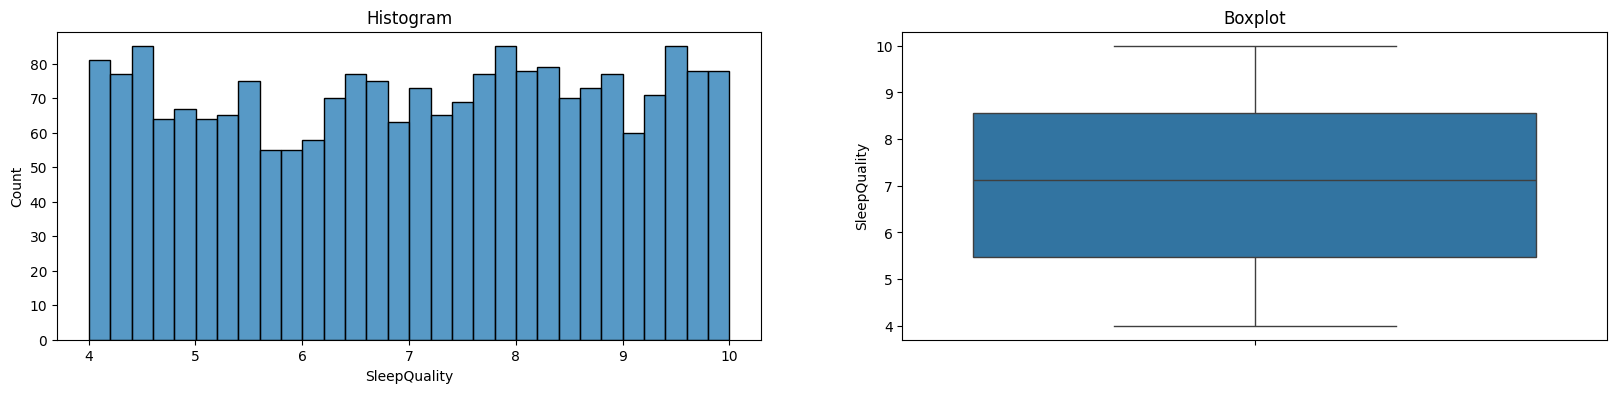

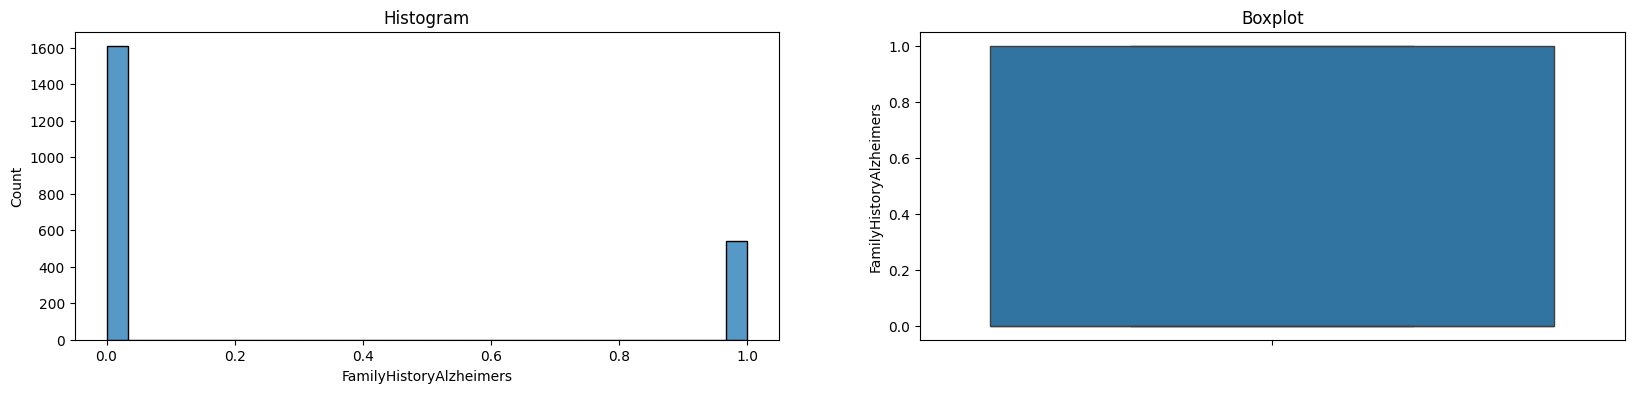

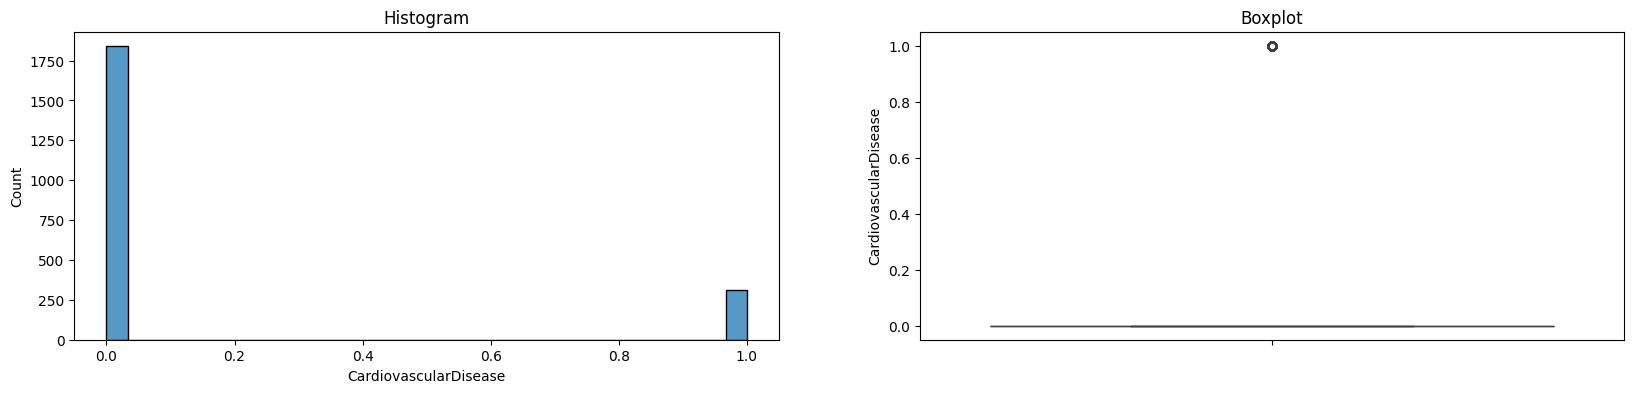

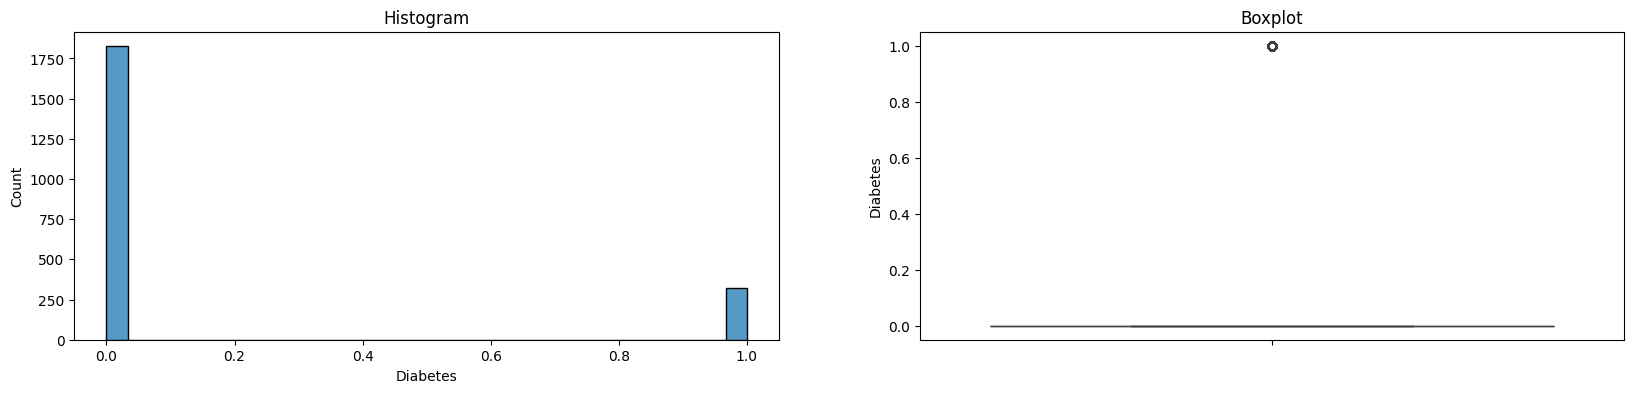

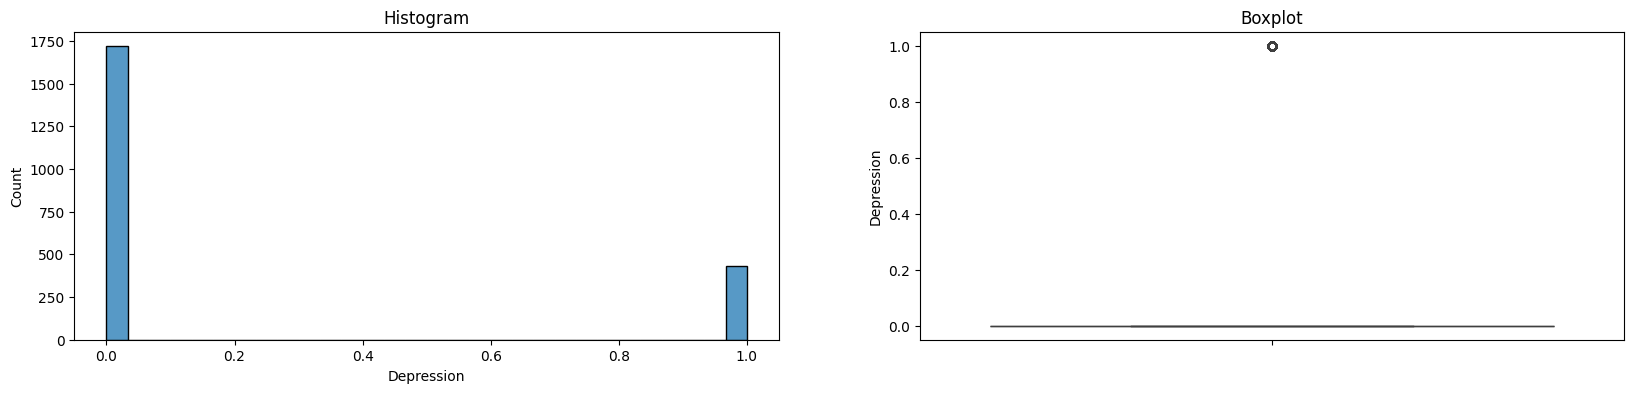

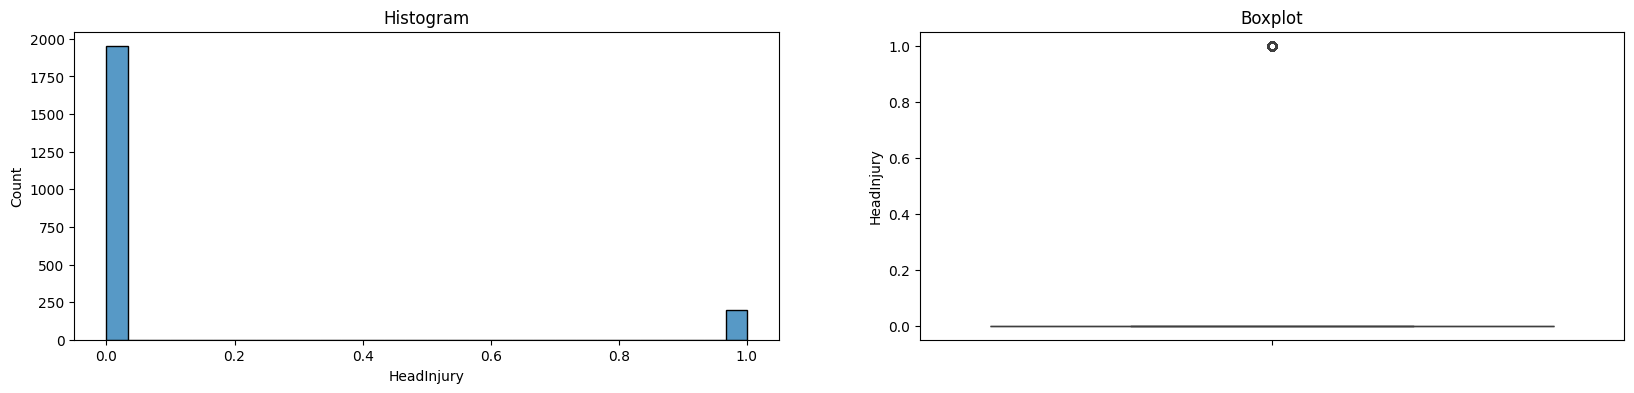

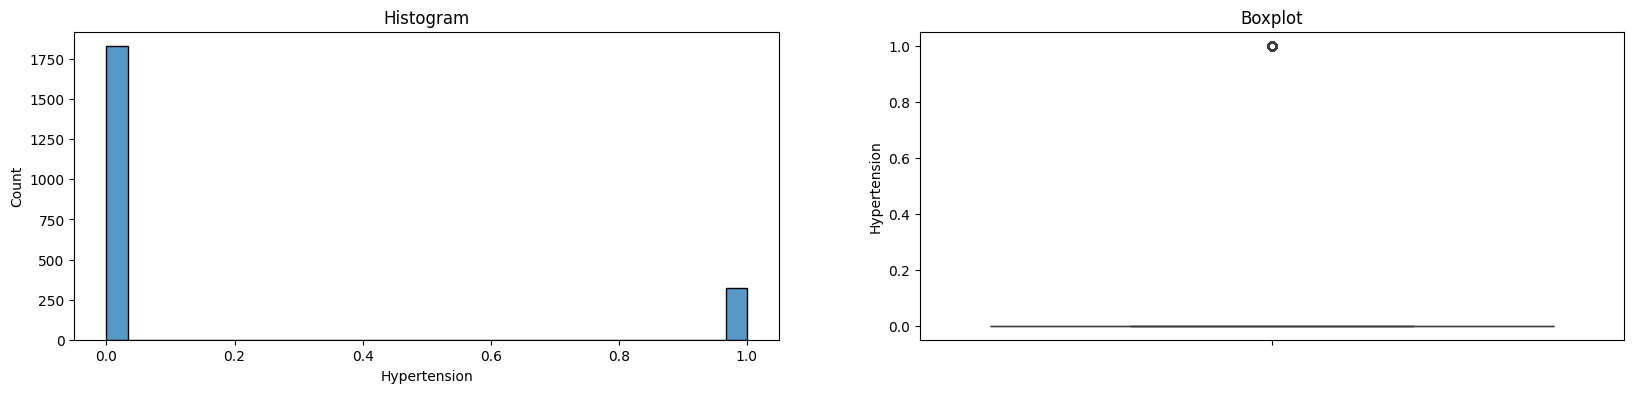

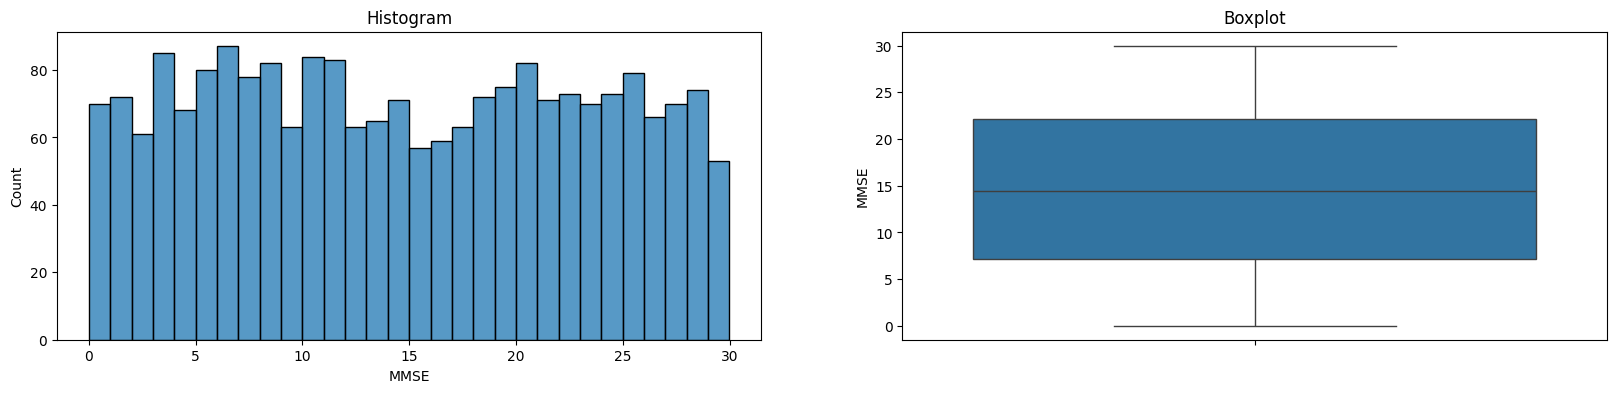

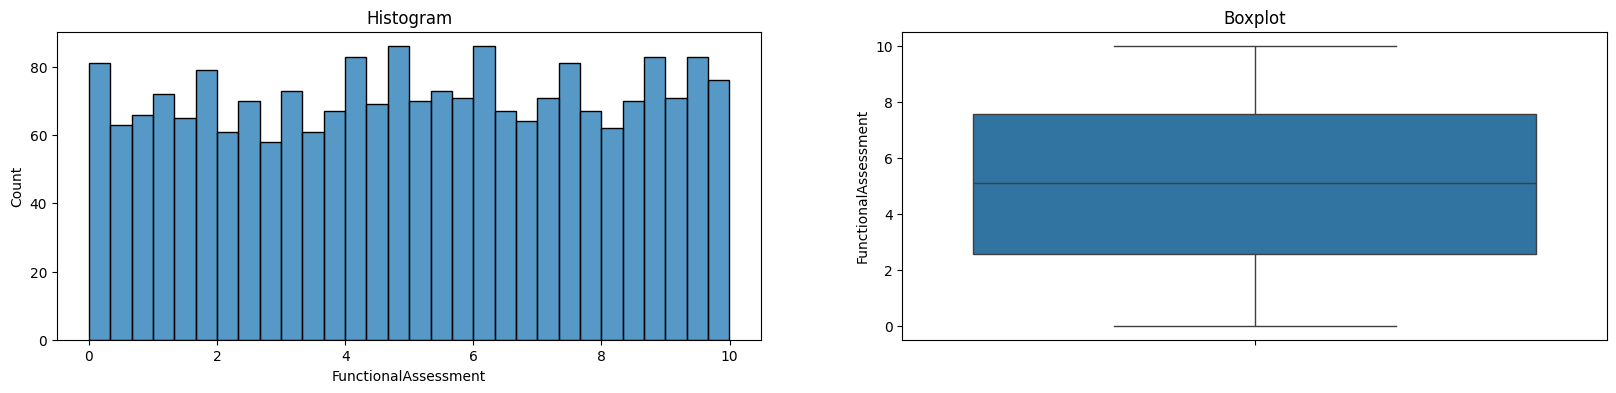

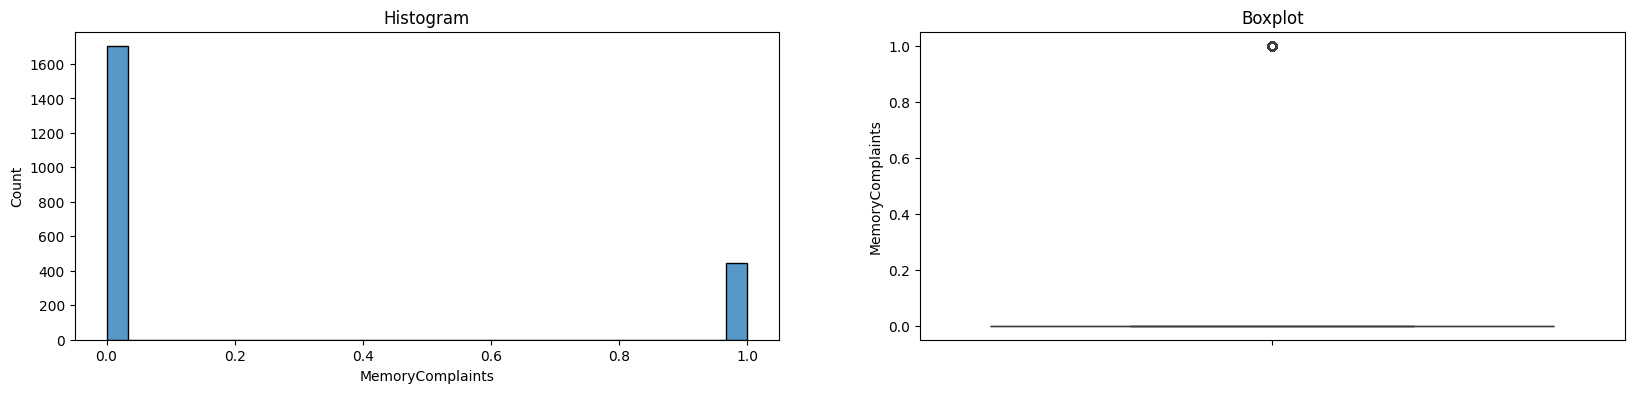

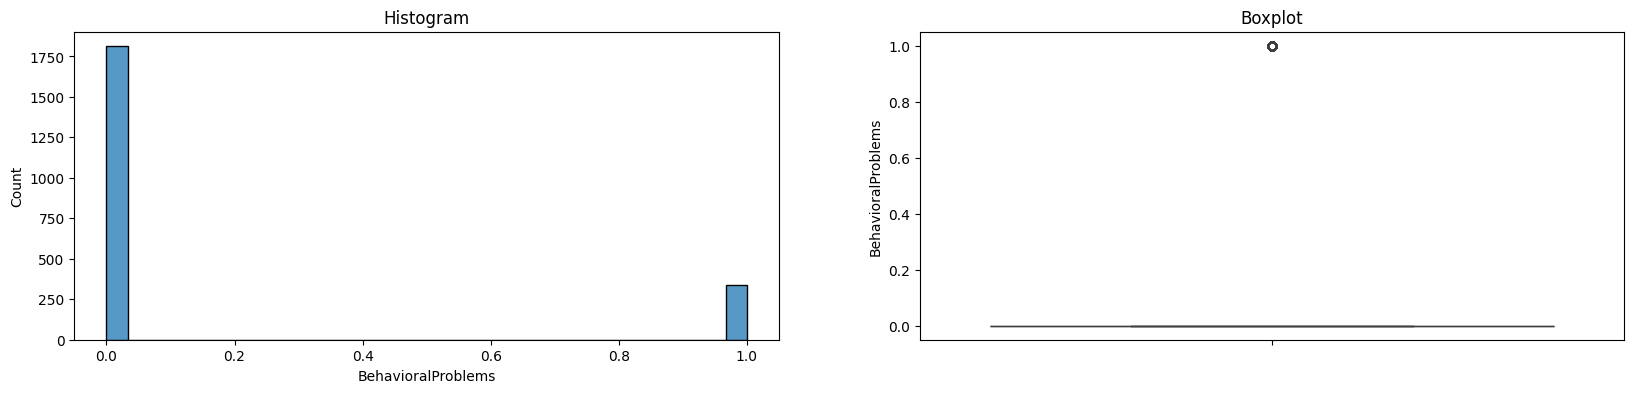

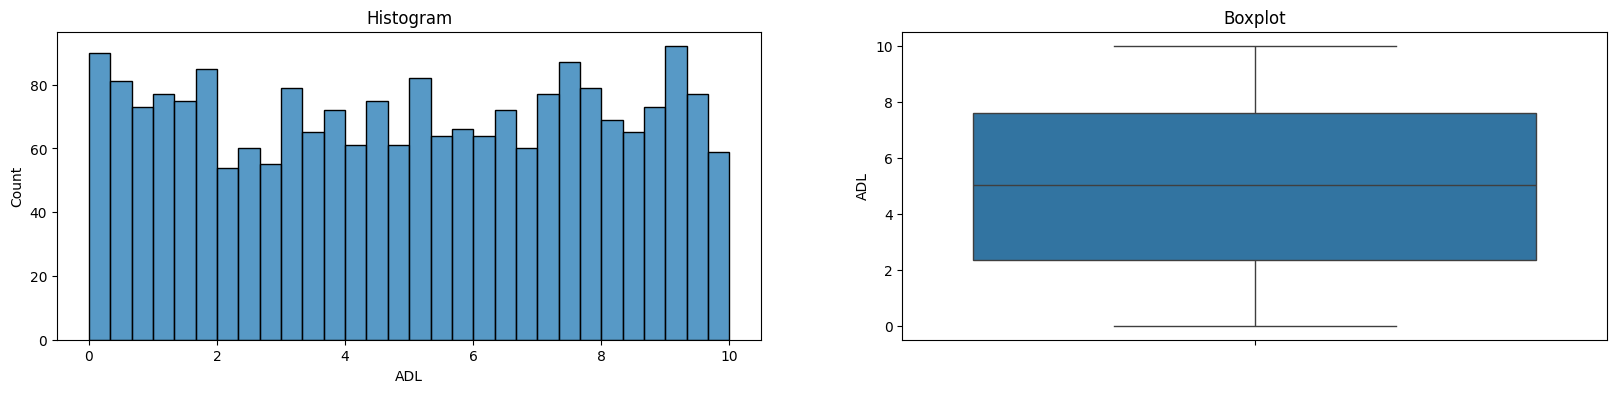

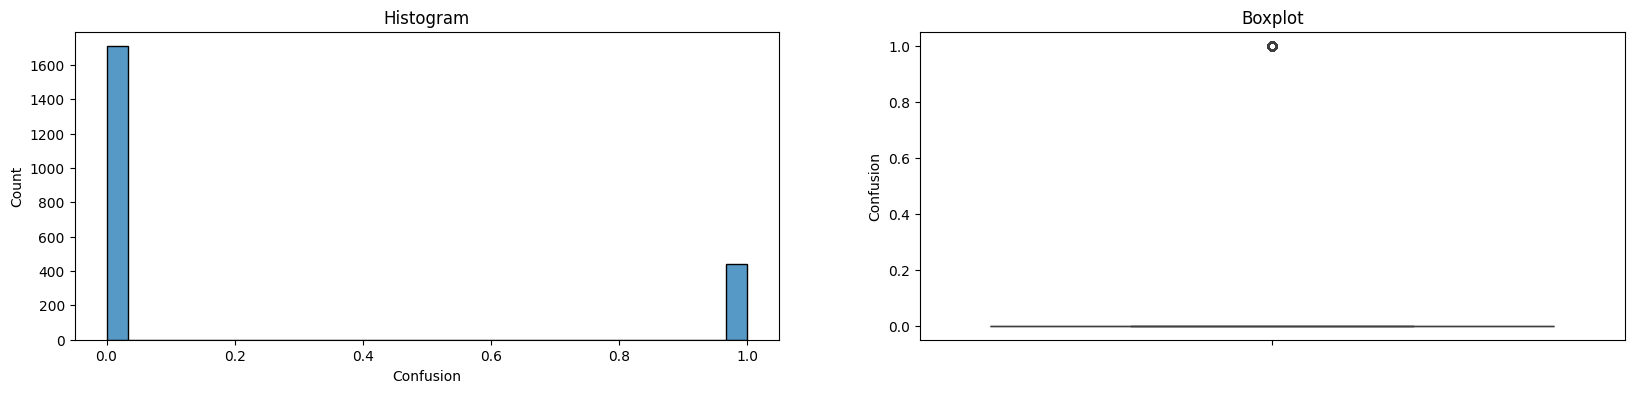

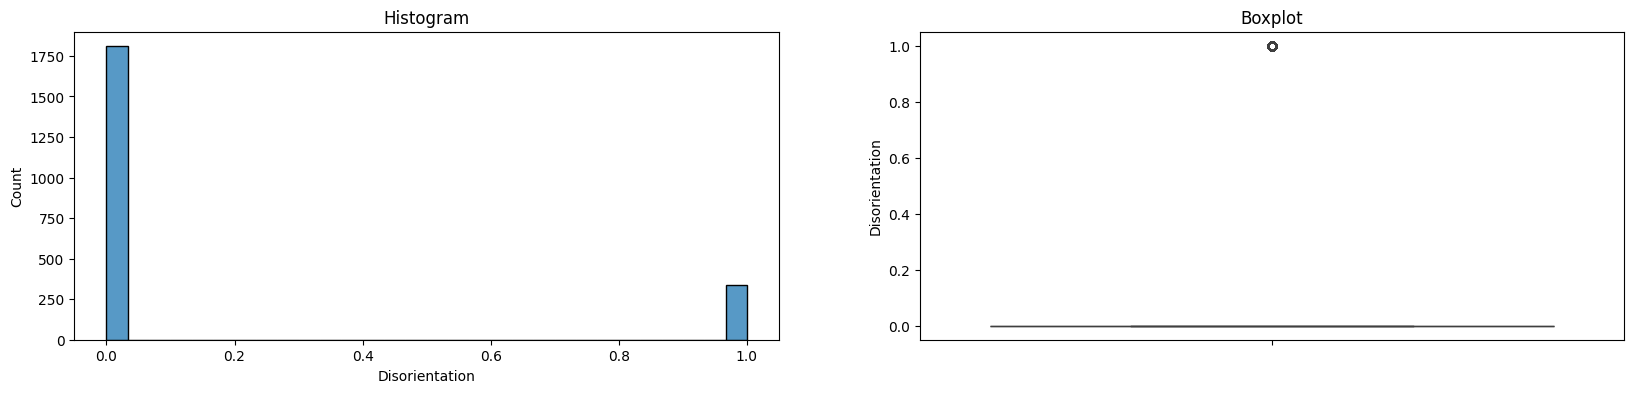

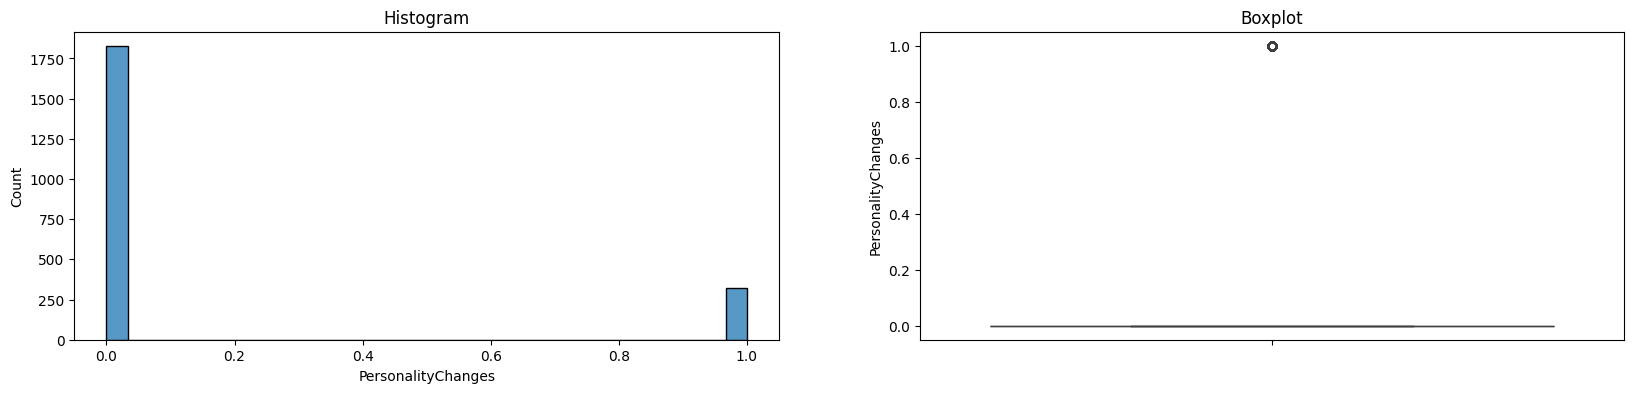

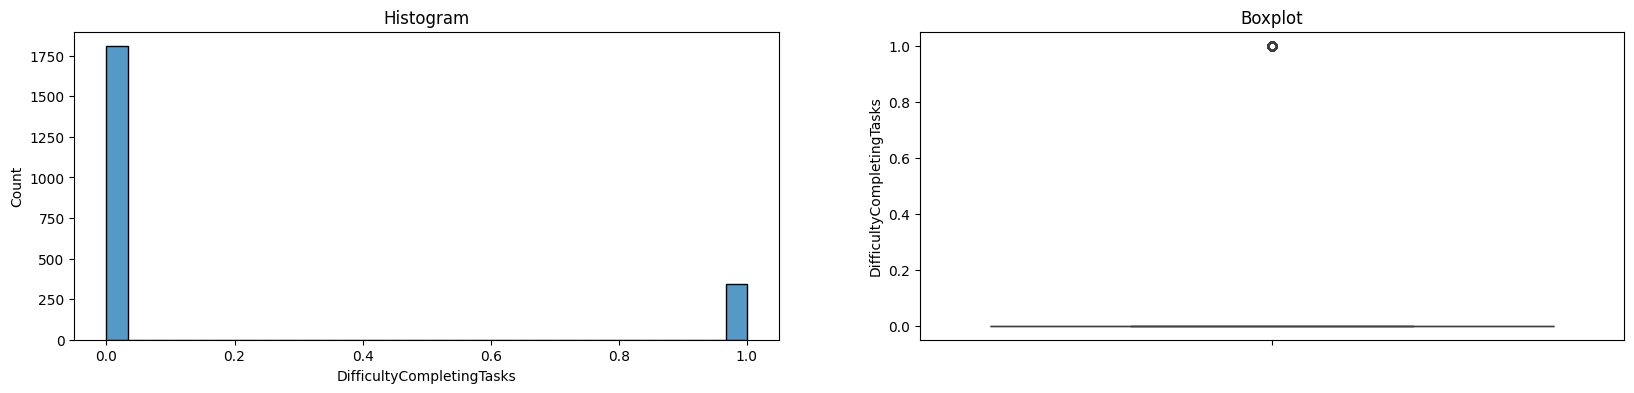

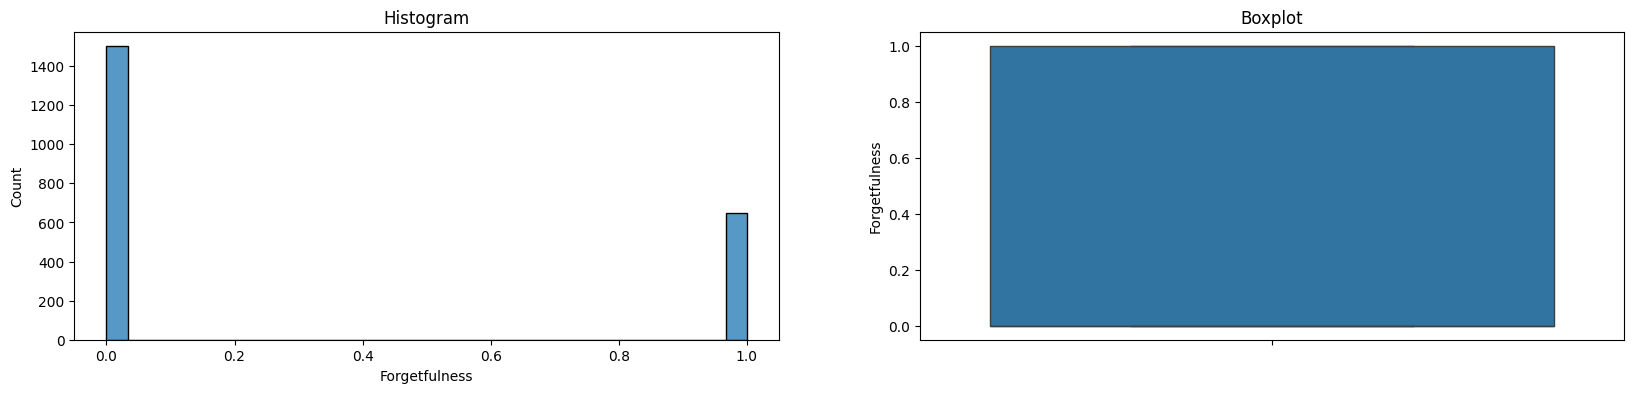

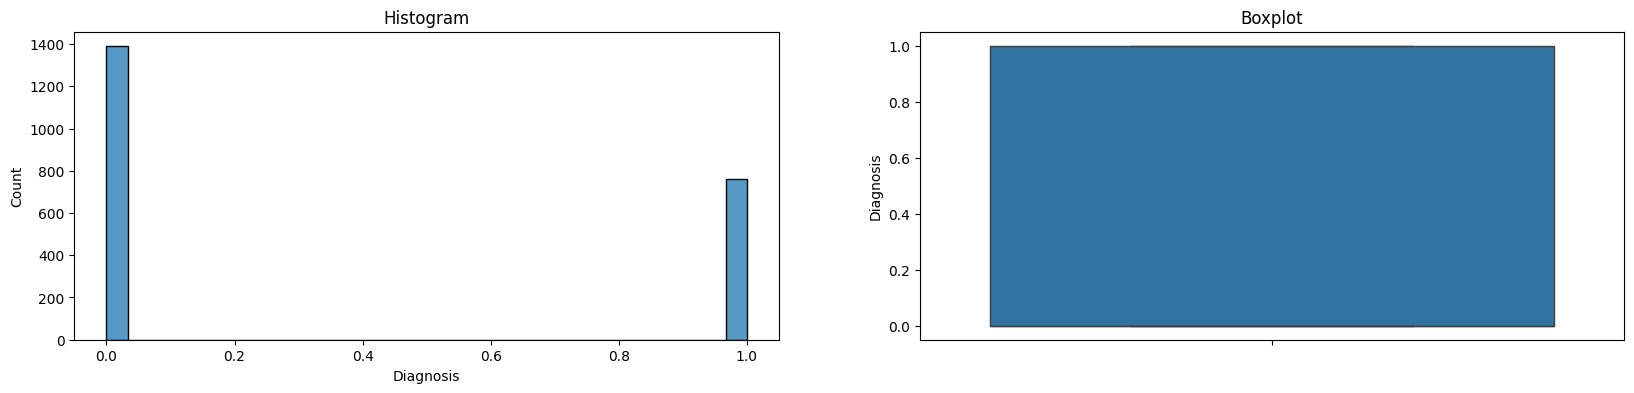

In [70]:
check_plot(df)

Tidak perlu handling outlier

# Data Cleaning

In [71]:
# cek data tidak konsisten
for i in df_eda.columns:
    print(f'===== {i} =====')
    print(df_eda[i].unique())

===== Age =====
[73 89 74 86 68 75 72 87 78 84 64 69 63 65 82 77 71 83 79 67 66 70 85 60
 88 62 81 61 80 90 76]
===== Gender =====
[0 1]
===== EducationLevel =====
[2 0 1 3]
===== BMI =====
[22.92774923 26.82768119 17.79588244 ... 15.47647896 15.29991122
 33.28973831]
===== Smoking =====
[0 1]
===== AlcoholConsumption =====
[13.29721773  4.54252382 19.55508453 ...  4.59467018  8.67450518
  7.89070315]
===== PhysicalActivity =====
[6.32711247 7.61988454 7.84498779 ... 9.88600229 6.35428175 6.57099338]
===== SleepQuality =====
[9.02567867 7.15129274 9.67357416 ... 5.76946355 8.32287396 9.87871052]
===== FamilyHistoryAlzheimers =====
[0 1]
===== CardiovascularDisease =====
[0 1]
===== Diabetes =====
[1 0]
===== Depression =====
[1 0]
===== HeadInjury =====
[0 1]
===== Hypertension =====
[0 1]
===== MMSE =====
[21.46353236 20.61326731  7.35624862 ... 17.0110031   4.03049088
 11.11477737]
===== FunctionalAssessment =====
[6.51887697 7.1186955  5.89507735 ... 1.97213657 5.17389096 6.30754331

# EDA (Exploratory Data Analysis)

## Distribusi Data

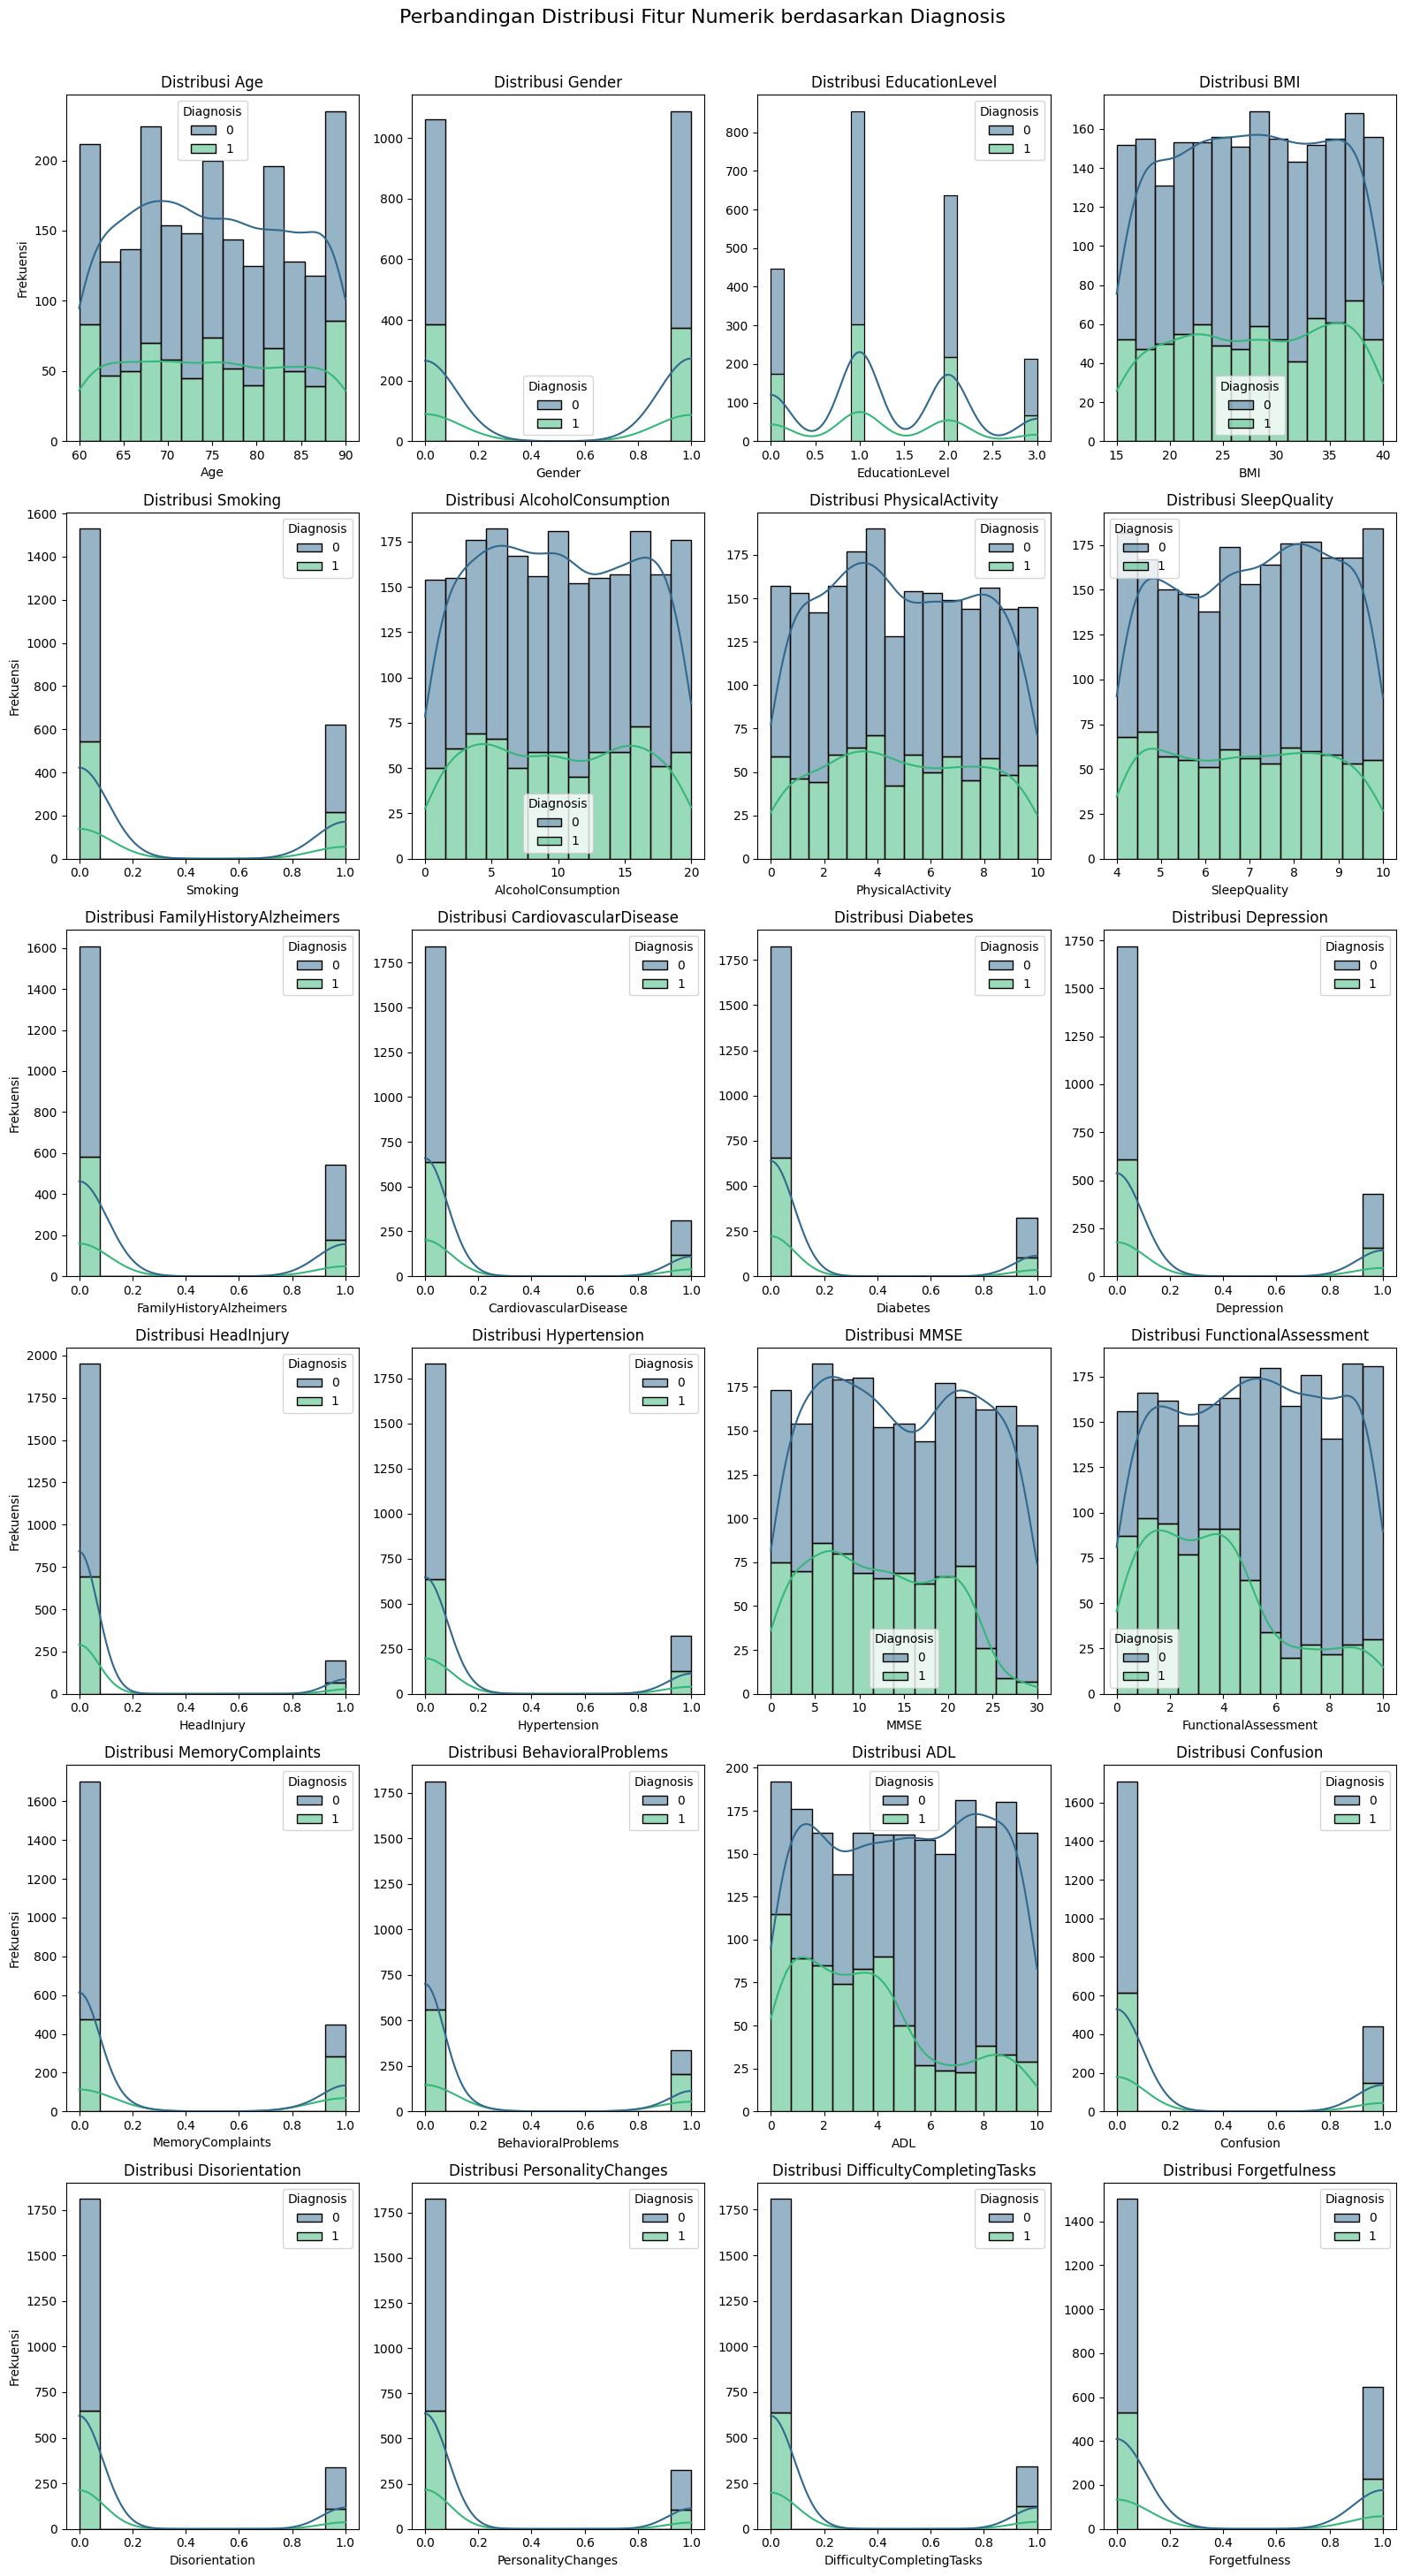

In [72]:
cols = df_eda.select_dtypes(include=['int64', 'float64']).drop(columns='Diagnosis').columns

N_COLS = 4  # Jumlah gambar per baris
N_ROWS = int(np.ceil(len(cols) / N_COLS)) # Hitung jumlah baris yang diperlukan


plt.figure(figsize=(4 * N_COLS, 5 * N_ROWS))


for index, col in enumerate(cols):

    plt.subplot(N_ROWS, N_COLS, index + 1)

    sns.histplot(
        data=df_eda,
        x=col,
        hue='Diagnosis',
        multiple='stack',
        kde=True,
        palette='viridis'
    )

    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')


    if index % N_COLS != 0:
        plt.ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Sesuaikan agar plot tidak tumpang tindih
plt.suptitle('Perbandingan Distribusi Fitur Numerik berdasarkan Diagnosis', fontsize=16, y=1.0)
plt.show()

/tmp/ipython-input-2643850155.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2643850155.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2643850155.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2643850155.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2643850155.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated a

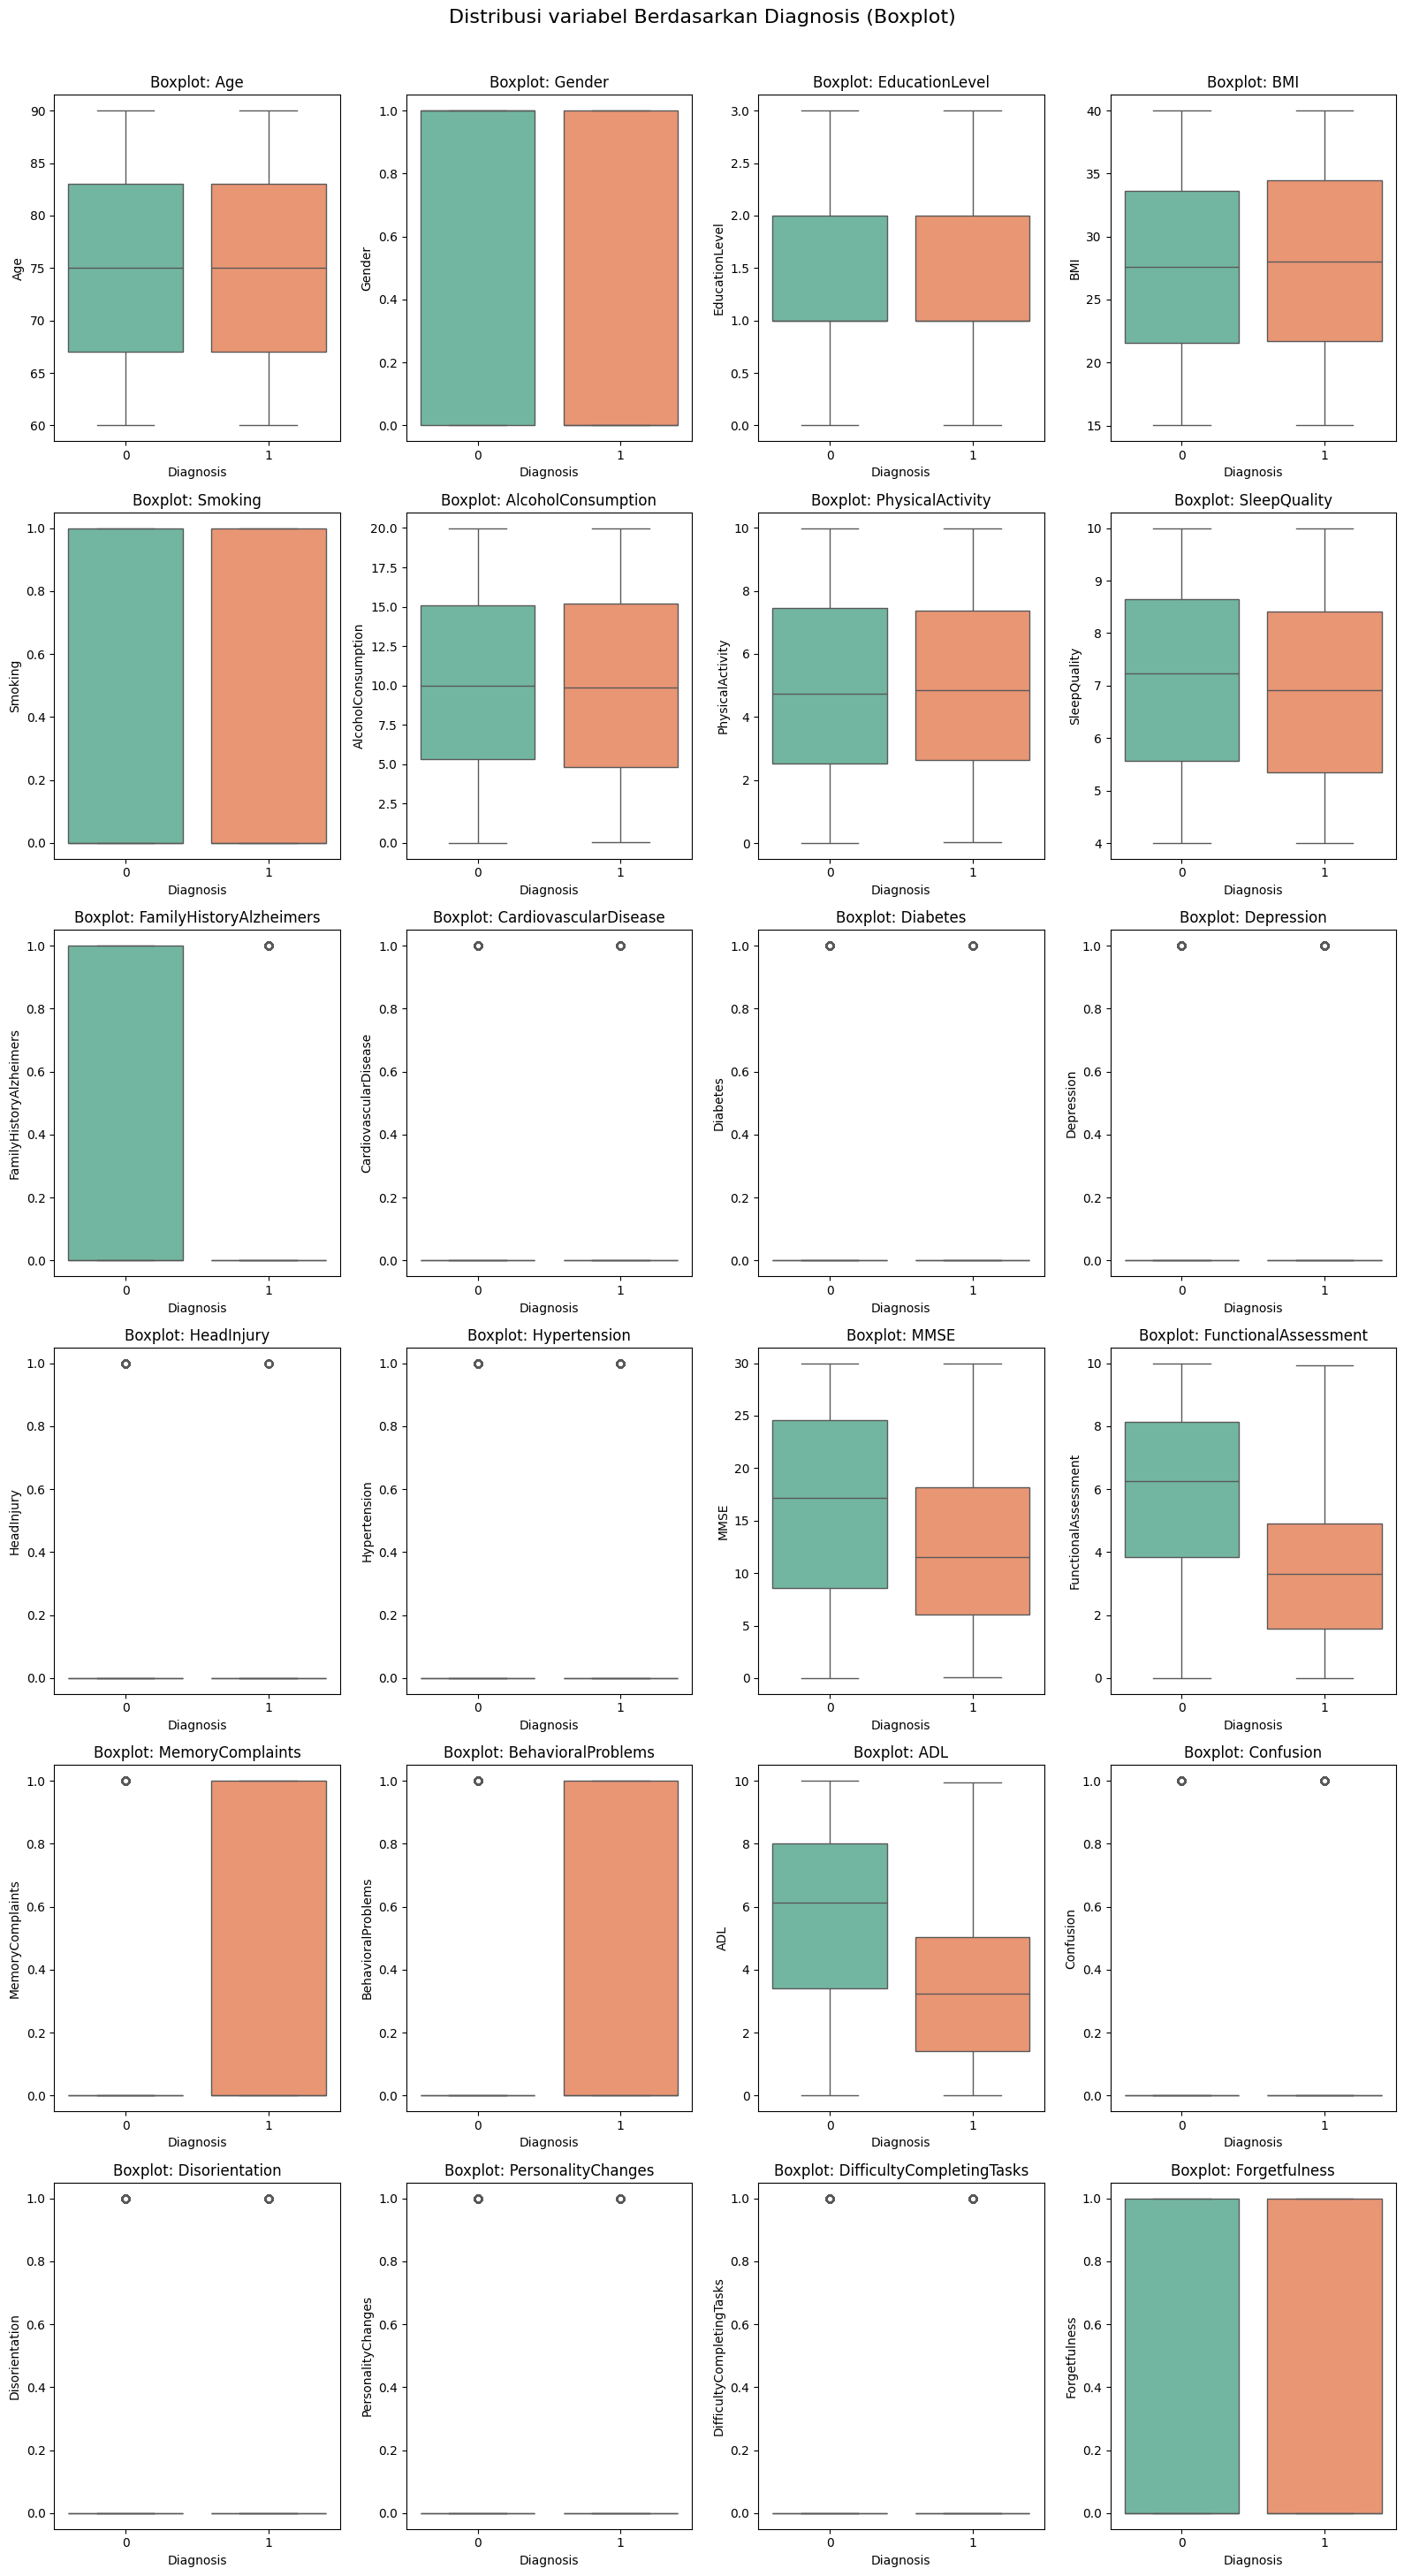

In [73]:
N_COLS = 4  # Jumlah gambar per baris
N_ROWS = int(np.ceil(len(cols) / N_COLS)) # Hitung jumlah baris yang diperlukan

plt.figure(figsize=(4 * N_COLS, 5 * N_ROWS))

for index, col in enumerate(cols):

    plt.subplot(N_ROWS, N_COLS, index + 1)

    sns.boxplot(
        data=df_eda,
        x='Diagnosis',
        y=col,
        palette='Set2'
    )

    plt.title(f'Boxplot: {col}', fontsize=12)
    plt.xlabel('Diagnosis', fontsize=10)
    plt.ylabel(col, fontsize=10)


plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.suptitle('Distribusi variabel Berdasarkan Diagnosis (Boxplot)', fontsize=16, y=1.0)
plt.show()

**Berdasarkan Informasi Pribadi Pasien:**



*   **Age** : Distribusi menunjukkan bahwa frekuensi diagnosis Non-AD lebih tinggi di seluruh rentang usia, namun proporsi pasien dengan Alzheimer cenderung bertambah seiring bertambahnya usia. Dapat dilihat bahwa proporsi pasien dengan Alzheimer paling tinggi berada pada umur 60 dan 90 tahun. Secara klinis menyatakan bahwa Alzheimer biasa terjadi pada usia lanjut, semakin tinggi usia, maka semakin besar risiko terjadinya gangguan kognitif.

*   **Gender** : Proporsi diagnosis berbeda antar gender, di mana gender 0 (Male) tampak sedikit lebih rentan terkena Alzheimer dibanding gender 1 (Female). Namun, secara umum jumlah pasien Non-AD tetap lebih tinggi.

*   **Education Level** : Pasien dengan tingkat pendidikan High School (1) memiliki proporsi Alzheimer lebih tinggi dibandingkan jenjang lain. Sebaliknya, jenjang Higher (3) menunjukkan jumlah kasus Alzheimer paling sedikit. Hal ini mendukung teori cognitive reserve, yaitu semakin tinggi tingkat pendidikan, semakin kuat kemampuan otak menahan gejala Alzheimer.



---

**Berdasarkan Faktor Gaya Hidup**

*  **BMI** : Distribusi menunjukkan bahwa baik BMI rendah maupun tinggi dapat ditemukan pada pasien Alzheimer. Tidak ada yang dominan, namun nilai BMI yang sangat tinggi dapat meningkatkan risiko melalui faktor metabolik.

*  **Alcohol Consumption** : Konsumsi alkohol tampak tidak memiliki pengaruh terhadap diagnosis Alzheimer karena distribusi relatif merata antara pasien AD dan Non-AD.

*  **Physical Activity** : Pasien dengan durasi aktivitas fisik rendah menunjukkan potensi lebih tinggi menderita Alzheimer. Maka, aktivitas fisik yang cukup berpotensi menurunkan risiko Alzheimer karena dapat meningkatkan neuroplasticity dan fungsi otak.

*  **Sleep Quality** : Kualitas tidur menunjukkan pola distribusi yang merata antara AD dan Non-AD, sehingga belum terlihat pengaruh terhadap diagnosis Alzheimer.



---

**Berdasarkan Faktor Kognitif**

*  **MMSE (Mini Mental State Examination)** : Skor MMSE rendah memiliki korelasi dengan diagnosis Alzheimer. Variabel ini merupakan prediktor kognitif terkuat, karena mencerminkan penurunan fungsi memori dan orientasi mental pasien.

*  **Functional Assessment** : Skor rendah menunjukkan kemampuan fungsional menurun dan berkaitan dengan peningkatan risiko Alzheimer. Pola ini berkaitan dengan karakteristik pasien Alzheimer yang mengalami kesulitan dalam aktivitas sehari-hari.

*  **ADL (Activity Daily Living)** : Pasien dengan skor ADL rendah (memiliki banyak kesulitan dalam kegiatan hari-hari) cenderung lebih tinggi diagnosa Alzheimer, yang menandakan adanya gangguan kemandirian pada pasien dengan penurunan fungsi kognitif.


---

**Berdasarkan Gejala Klinis** :

*  **Memory Complaints, Behavioral Problems, Confusion, Disorientation, Personality Changes, Difficulty Completing Tasks** : Sebagian besar distribusi pasien Non-AD lebih tinggi pada kategori “tidak mengalami gejala", namun jika ingin dilihat pasien Alzheimer lebih tinggi juga pada kategori "tidak memiliki gejala". Padahal secara klinis menyatakan bahwa gejala-gejala tersebut justru merupakan ciri khas Alzheimer. Maka dari itu, hasil distribusi ini perlu dipahami sebagai efek dari ketidakseimbangan data, bukan indikasi bahwa pasien tanpa gejala lebih berisiko.





## Korelasi

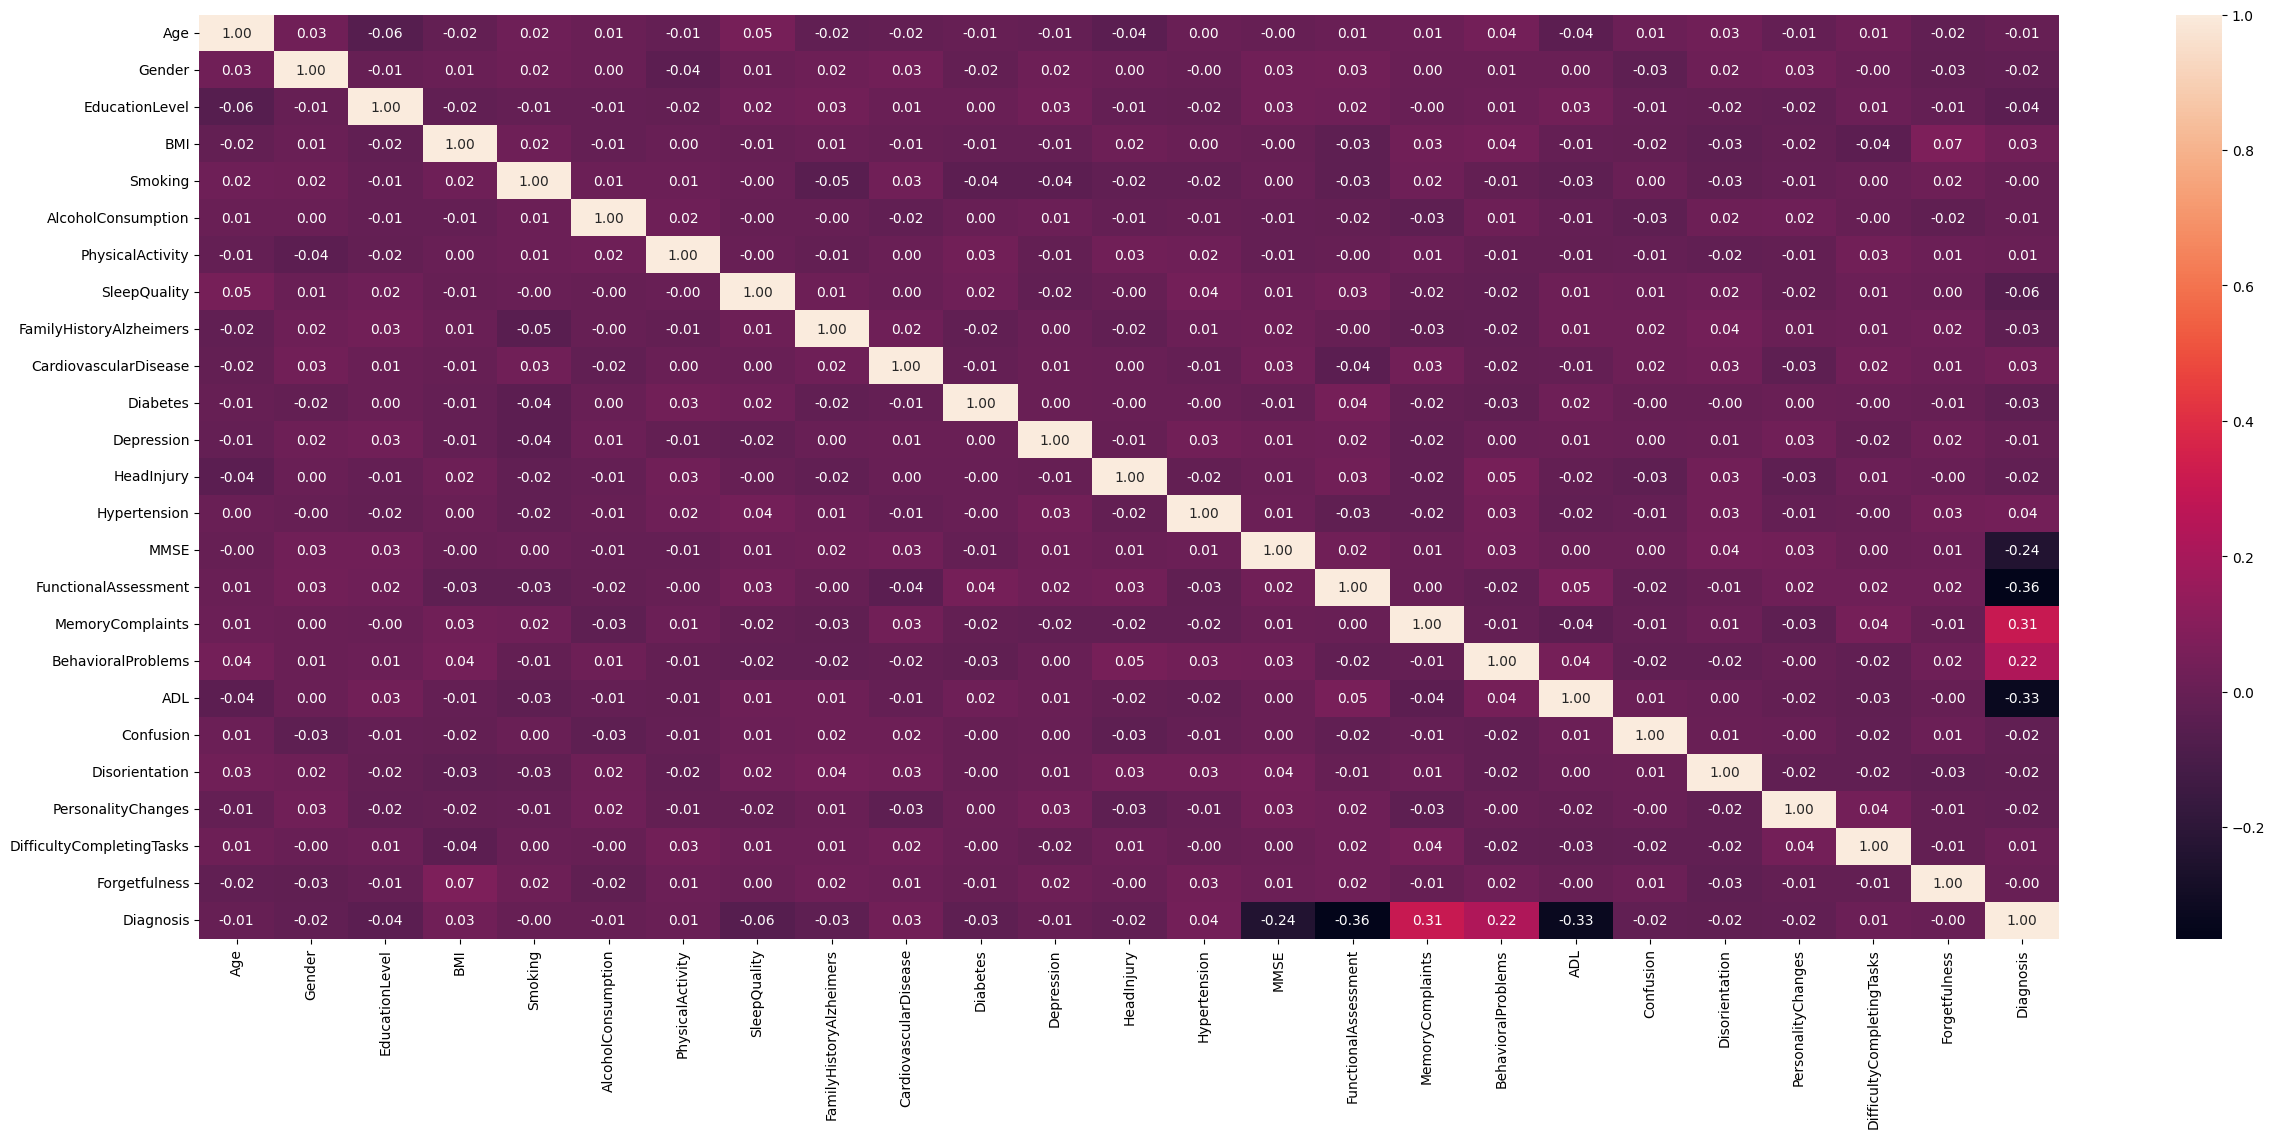

In [74]:
korelasi1 = df_eda[['Age', 'Gender', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'MMSE',
       'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL',
       'Confusion', 'Disorientation', 'PersonalityChanges',
       'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis',]]


corr = korelasi1.corr()

plt.figure(figsize=(30,12))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

**Insight :**

1. **MMSE (-0.24) :** Menunjukkan korelasi negatif. Artinya, semakin rendah skor Mini-Mental State Examination, semakin tinggi kemungkinan pasien menderita Alzheimer. Secara klinis bahwa Alzheimer menyebabkan penurunan kemampuan kognitif yang terukur melalui skor MMSE.

2. **Functional Assessment (-0.36) :** Menunjukkan korelasi negatif. Artinya, pasien dengan penilaian fungsional rendah (FunctionalAssessment rendah) memiliki risiko lebih besar terkena Alzheimer karena menunjukkan penurunan kemampuan aktivitas harian.

3. **ADL (-0.33) :** Menunjukkan koreasi negatif. Artinya, semakin menurun kemampuan pasien dalam menjalankan aktivitas harian, semakin besar kemungkinan mereka memiliki Alzheimer.

4. **Memory Complaints (0.31) :** Menunjukkan korelasi positif. Artinya, pasien dengan keluhan memori cenderung memiliki diagnosis Alzheimer lebih tinggi. Secara klinis, gejala utama Alzheimer yaitu penurunan daya ingat jangka pendek dan panjang.

5. **Behavioral Problems (0.22) :** Menunjukkan korelasi positif. Artinya, pasien yang mengalami masalah perilaku memiliki kecenderungan lebih tinggi terhadap diagnosis Alzheimer. Secara klinis, gangguan perilaku seperti mudah marah, cemas, atau perubahan kepribadian sering muncul pada tahap menengah Alzheimer.

6. **Age, Gender, BMI, AlcoholConsumption, SleepQuality, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension, dan PhysicalActivity ( < |0.1| atau rentang -0.06 hingga 0.05):** Korelasi yang sangat lemah tersebut menunjukkan bahwa faktor-faktor tersebut tidak memiliki hubungan linear langsung dengan diagnosis Alzheimer

In [75]:
df_eda = df_eda.drop(columns=['Smoking','Forgetfulness'])

Dilakukan penghapusan kolom smoking dan forgetfullness karena memiliki korelasi tidak berarti

## Perbandingan kelompok Alzheimer dan Non Alzheimer

#### Apakah rata-rata skor MMSE, Functional Assessment, ADL, Behavioral Problems, dan Memory Complaints pasien AD secara signifikan lebih rendah daripada Non-AD?

In [76]:
skor = df_eda.groupby('Diagnosis')[['MMSE', 'ADL', 'FunctionalAssessment']].mean()
skor

,MMSE,ADL,FunctionalAssessment
Diagnosis,,,
0,16.265543,5.707951,5.860669
1,11.994657,3.657938,3.653380


/tmp/ipython-input-2890949845.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2890949845.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2890949845.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




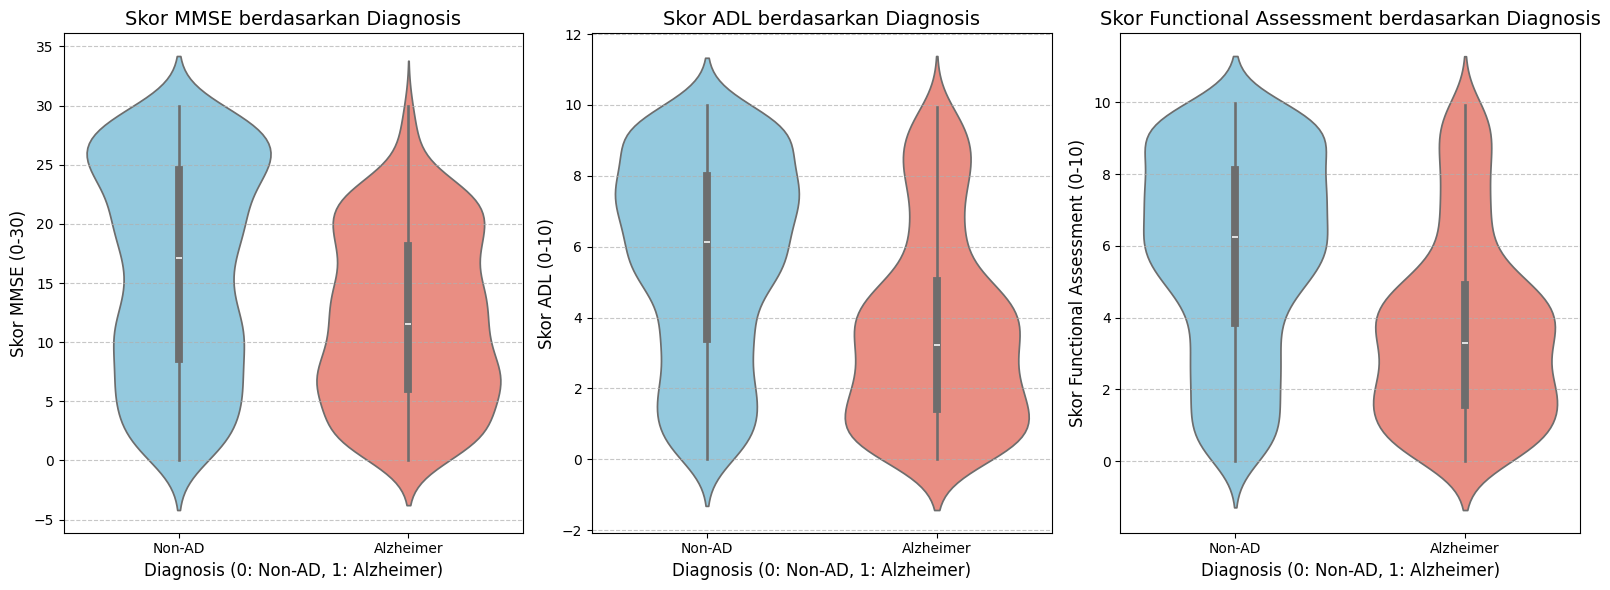

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# MMSE vs. Diagnosis
sns.violinplot(
    x='Diagnosis',
    y='MMSE',
    data=df_eda,
    palette={'0': 'skyblue', '1': 'salmon'},
    ax=axes[0]
)
axes[0].set_title('Skor MMSE berdasarkan Diagnosis', fontsize=14)
axes[0].set_xlabel('Diagnosis (0: Non-AD, 1: Alzheimer)', fontsize=12)
axes[0].set_ylabel('Skor MMSE (0-30)', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Non-AD', 'Alzheimer'])
axes[0].grid(axis='y', linestyle='--', alpha=0.7)


#  ADL vs. Diagnosis
sns.violinplot(
    x='Diagnosis',
    y='ADL',
    data=df_eda,
    palette={'0': 'skyblue', '1': 'salmon'},
    ax=axes[1]
)
axes[1].set_title('Skor ADL berdasarkan Diagnosis', fontsize=14)
axes[1].set_xlabel('Diagnosis (0: Non-AD, 1: Alzheimer)', fontsize=12)
axes[1].set_ylabel('Skor ADL (0-10)', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Non-AD', 'Alzheimer'])
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

#  Functional vs. Diagnosis
sns.violinplot(
    x='Diagnosis',
    y='FunctionalAssessment',
    data=df_eda,
    palette={'0': 'skyblue', '1': 'salmon'},
    ax=axes[2]
)
axes[2].set_title('Skor Functional Assessment berdasarkan Diagnosis', fontsize=14)
axes[2].set_xlabel('Diagnosis (0: Non-AD, 1: Alzheimer)', fontsize=12)
axes[2].set_ylabel('Skor Functional Assessment (0-10)', fontsize=12)
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Non-AD', 'Alzheimer'])
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [78]:
#Uji-t untuk MMSE
t_mmse, p_mmse = stats.ttest_ind(
    df_eda[df_eda['Diagnosis'] == 0]['MMSE'],
    df_eda[df_eda['Diagnosis'] == 1]['MMSE'],
    equal_var=False
)

# Uji-t untuk ADL
t_adl, p_adl = stats.ttest_ind(
    df_eda[df_eda['Diagnosis'] == 0]['ADL'],
    df_eda[df_eda['Diagnosis'] == 1]['ADL'],
    equal_var=False
)

t_fa, p_fa = stats.ttest_ind(
    df_eda[df_eda['Diagnosis'] == 0]['FunctionalAssessment'],
    df_eda[df_eda['Diagnosis'] == 1]['FunctionalAssessment'],
    equal_var=False
)

df_ttest = pd.DataFrame({
    'Variable': ['MMSE', 'ADL', 'FunctionalAssessment'],
    't-statistic': [t_mmse, t_adl, t_fa],
    'p-value': [p_mmse, p_adl, p_fa]
})
df_ttest['Signifikansi'] = df_ttest['p-value'].apply(lambda x: 'Signifikan' if x < 0.05 else 'Tidak Signifikan')

df_ttest = df_ttest.round(3)

df_ttest

,Variable,t-statistic,p-value,Signifikansi
0,MMSE,12.025,0.0,Signifikan
1,ADL,16.546,0.0,Signifikan
2,FunctionalAssessment,18.552,0.0,Signifikan


Insight :

* Rata-rata skor MMSE, ADL, Functional Assessment pada pasien Alzheimer secara signifikan lebih rendah dibandingkan pasien Non-AD.

* Hal ini menunjukkan bahwa kemampuan kognitif (MMSE), fungsi aktivitas harian (ADL), dan functional assessment menurun secara nyata pada pasien yang didiagnosis Alzheimer.

* Perbedaan distribusi pada violin plot juga mendukung hasil ini, dapat dilihat bahwa sebaran skor pasien Alzheimer cenderung bergeser ke nilai yang lebih rendah dibanding Non-AD.

* Karena p-value < 0.05, maka hasil uji menunjukkan bahwa adanya perbedaan yang signifikan secara statistik antara kelompok Non-AD dan Alzheimer untuk ketiga variabel (MMSE, ADL, dan functional assessment).

#### Apakah proporsi pasien yang memiliki FamilyHistoryAlzheimers, CardiovascularDisease, Depression, Hypertension, dan Head injury lebih tinggi pada kelompok AD?

In [79]:
rm_freq = (
    df_eda.groupby('Diagnosis')[['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Depression', 'Hypertension', 'HeadInjury']]
    .sum()
    .reset_index()
)

# Hitung total pasien per Diagnosis
rm_freq['total'] = df_eda.groupby('Diagnosis').size().values

# Hitung proporsi (%) tiap gejala
rm_freq['FamilyHistoryAlzheimers_%'] = (rm_freq['FamilyHistoryAlzheimers'] / rm_freq['total']) * 100
rm_freq['CardiovascularDisease_%'] = (rm_freq['CardiovascularDisease'] / rm_freq['total']) * 100
rm_freq['Depression_%'] = (rm_freq['Depression'] / rm_freq['total']) * 100
rm_freq['HeadInjury_%'] = (rm_freq['HeadInjury'] / rm_freq['total']) * 100
rm_freq['Hypertension_%'] = (rm_freq['Hypertension'] / rm_freq['total']) * 100

rm_freq

,Diagnosis,FamilyHistoryAlzheimers,CardiovascularDisease,Depression,Hypertension,HeadInjury,total,FamilyHistoryAlzheimers_%,CardiovascularDisease_%,Depression_%,HeadInjury_%,Hypertension_%
0,0,365,189,281,194,135,1389,26.277898,13.606911,20.230382,9.719222,13.966883
1,1,177,121,150,126,64,760,23.289474,15.921053,19.736842,8.421053,16.578947


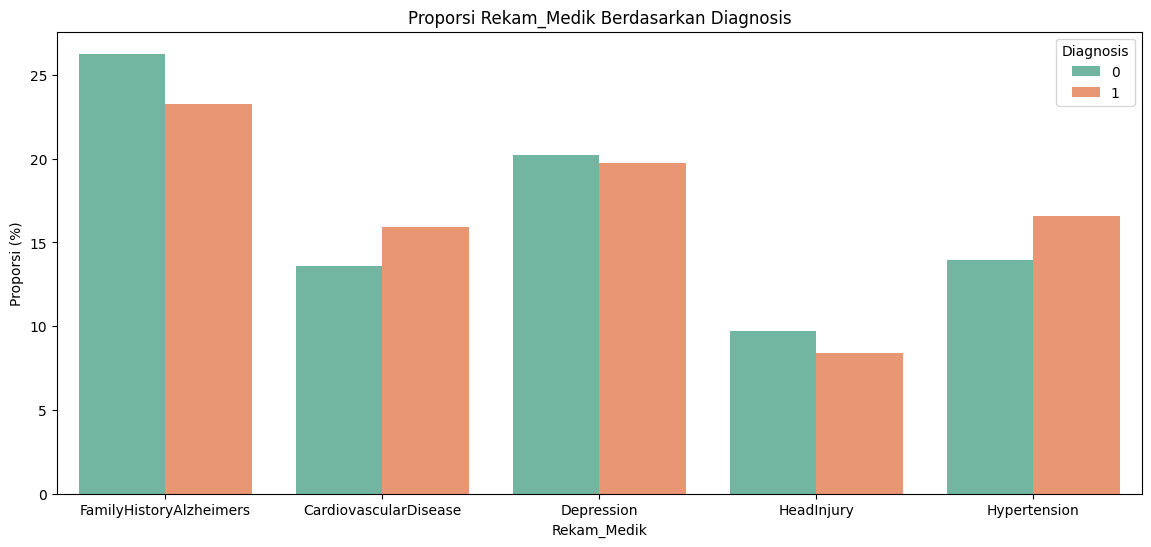

In [80]:
rm_melt = rm_freq.melt(
    id_vars='Diagnosis',
    value_vars=['FamilyHistoryAlzheimers_%', 'CardiovascularDisease_%', 'Depression_%', 'HeadInjury_%', 'Hypertension_%'],
    var_name='Rekam_Medik',
    value_name='Proportion (%)'
)


rm_melt['Rekam_Medik'] = rm_melt['Rekam_Medik'].str.replace('_%', '')

plt.figure(figsize=(14,6))
sns.barplot(data=rm_melt, x='Rekam_Medik', y='Proportion (%)', hue='Diagnosis', palette='Set2')
plt.title('Proporsi Rekam_Medik Berdasarkan Diagnosis')
plt.ylabel('Proporsi (%)')
plt.xlabel('Rekam_Medik')
plt.show()

In [81]:
cols_rm = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Depression', 'Hypertension', 'HeadInjury']

chi_results = []

for i in cols_rm:
    table = pd.crosstab(df_eda[i], df_eda['Diagnosis'])

    # Lakukan uji Chi-square
    chi2, p, dof, expected = chi2_contingency(table)

    chi_results.append({
        'Variable': i,
        'Chi2': chi2,
        'p-value': p,
    })

chi_rm_df = pd.DataFrame(chi_results)

chi_rm_df['Signifikansi'] = chi_rm_df['p-value'].apply(lambda x: 'Signifikan' if x < 0.05 else 'Tidak Signifikan')

chi_rm_df



,Variable,Chi2,p-value,Signifikansi
0,FamilyHistoryAlzheimers,2.170309,0.140698,Tidak Signifikan
1,CardiovascularDisease,1.947683,0.162837,Tidak Signifikan
2,Depression,0.047019,0.828334,Tidak Signifikan
3,Hypertension,2.442487,0.118089,Tidak Signifikan
4,HeadInjury,0.836768,0.360323,Tidak Signifikan


Insight :

Secara proporsi terlihat bahwa banyak penderita Alzheimer berdasarkan riwayat jejak keluarga yang Alzheimer dan depression, disusul cardio vascular disease serta hypertension. Namun, berdasarkan hasil uji statistik chi-square menunjukkan bahwa tidak ada hubungan secara signifikan di semua riwayat medis terhadap diagnosis Alzheimer pada dataset ini. Namun, untuk informasi lebih lanjut, dapat digunakan sebagai indikasi awal untuk analisis selanjutnya.

#### Gejala mana yang memiliki frekuensi tertinggi di antara pasien AD, dan manakah yang paling jarang terjadi di antara Non-AD?

In [82]:
gejala_freq = (
    df_eda.groupby('Diagnosis')[['Confusion', 'Disorientation', 'PersonalityChanges']]
    .sum()
    .reset_index()
)

# Hitung total pasien per Diagnosis
gejala_freq['total'] = df_eda.groupby('Diagnosis').size().values

# Hitung proporsi (%) tiap gejala
gejala_freq['Confusion_%'] = (gejala_freq['Confusion'] / gejala_freq['total']) * 100
gejala_freq['Disorientation_%'] = (gejala_freq['Disorientation'] / gejala_freq['total']) * 100
gejala_freq['PersonalityChanges_%'] = (gejala_freq['PersonalityChanges'] / gejala_freq['total']) * 100

gejala_freq

,Diagnosis,Confusion,Disorientation,PersonalityChanges,total,Confusion_%,Disorientation_%,PersonalityChanges_%
0,0,293,229,217,1389,21.094312,16.486681,15.622750
1,1,148,111,107,760,19.473684,14.605263,14.078947


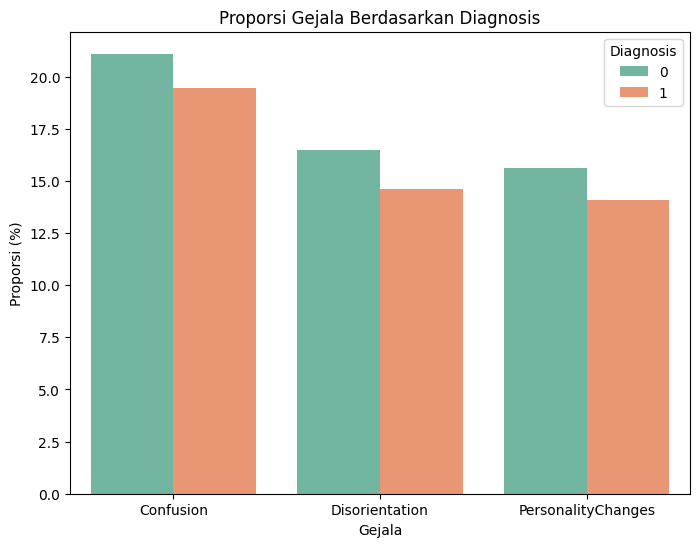

In [83]:
gejala_melt = gejala_freq.melt(
    id_vars='Diagnosis',
    value_vars=['Confusion_%', 'Disorientation_%', 'PersonalityChanges_%'],
    var_name='Gejala',
    value_name='Proportion (%)'
)


gejala_melt['Gejala'] = gejala_melt['Gejala'].str.replace('_%', '')

plt.figure(figsize=(8,6))
sns.barplot(data=gejala_melt, x='Gejala', y='Proportion (%)', hue='Diagnosis', palette='Set2')
plt.title('Proporsi Gejala Berdasarkan Diagnosis')
plt.ylabel('Proporsi (%)')
plt.xlabel('Gejala')
plt.show()

In [84]:
cols_gejala = ['Confusion', 'Disorientation', 'PersonalityChanges']

chi_results = []

for i in cols_gejala:
    table = pd.crosstab(df_eda[i], df_eda['Diagnosis'])

    # Lakukan uji Chi-square
    chi2, p, dof, expected = chi2_contingency(table)

    chi_results.append({
        'Variable': i,
        'Chi2': chi2,
        'p-value': p,
    })

chi_gjl_df = pd.DataFrame(chi_results)

chi_gjl_df['Signifikansi'] = chi_gjl_df['p-value'].apply(lambda x: 'Signifikan' if x < 0.05 else 'Tidak Signifikan')

chi_gjl_df



,Variable,Chi2,p-value,Signifikansi
0,Confusion,0.694786,0.404541,Tidak Signifikan
1,Disorientation,1.168140,0.279784,Tidak Signifikan
2,PersonalityChanges,0.797783,0.371757,Tidak Signifikan


Insight :

* Gejala yang paling sering muncul pada pendeerita Alzheimer adalah Behavioral Problems (26.7%) dengan perbedaan yang signifikan secara statistik dibandingkan non-AD. Hal ini menunjukkan bahwa gangguan perilaku merupakan salah satu faktor yang dapat membedakan pasien Alzheimer dan non-AD. Sementara itu, gejala selain Behavioral Problems tidak menunjukkan adanya perbedaan signifikan

* Selain Behavioral Problems, ternyata confusion sebagai salah satu faktor yang dapat diidentifikasi pasien tersebut menderita Alzheimer atau tidak, meskipun tidak memiliki perbedaan signifikan antara pasien Alzheimer dan non-AD.

#### Bagaimana perbandingan rata-rata MMSE antar Gender untuk pasien AD dan Non-AD?

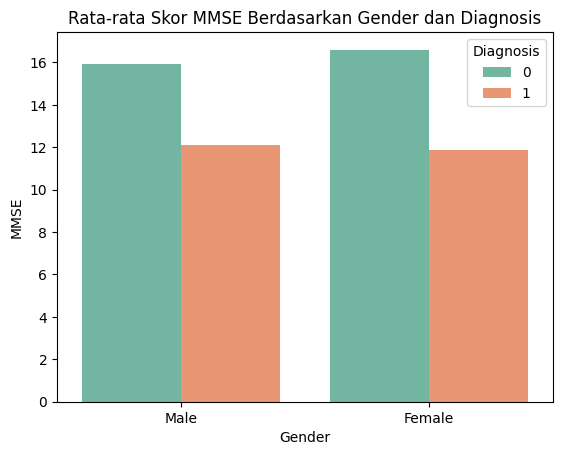

Gender  Diagnosis
0       0            15.911284
        1            12.126238
1       0            16.600452
        1            11.858855
Name: MMSE, dtype: float64

In [85]:
sns.barplot(
    data=df_eda,
    x='Gender',
    y='MMSE',
    hue='Diagnosis',
    errorbar=None,
    palette='Set2'
)

plt.title('Rata-rata Skor MMSE Berdasarkan Gender dan Diagnosis')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

df_eda.groupby(['Gender', 'Diagnosis'])['MMSE'].mean()


Insight :

* Pada pasien laki-laki dan perempuan menunjukkan kemampuan kognitif yang menurun pada diagnosis Alzheimer
* Penurunan skor ini cenderung hampir merata baik pada pasien laki-laki dan peremupuan. Namun, pada pasien laki laki memiliki skor MMSE lebih tinggi daripada perempuan. Artinya, laki-laki cenderung memiliki fungsi kognitif yang sedikit lebih baik dibandingkan perempuan di dataset ini.

#### Bagaimana perbandingan proporsi gaya hidup antara pasien Alzheimer (AD) dan Non-AD?

In [86]:
gh_freq = (
    df_eda.groupby('Diagnosis')[['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality']]
    .sum()
    .reset_index()
)

# Hitung total pasien per Diagnosis
gh_freq['total'] = df_eda.groupby('Diagnosis').size().values

# Hitung proporsi (%) tiap gejala
gh_freq['BMI_%'] = (gh_freq['BMI'] / gh_freq['total']) * 100
gh_freq['AlcoholConsumption_%'] = (gh_freq['AlcoholConsumption'] / gh_freq['total']) * 100
gh_freq['PhysicalActivity_%'] = (gh_freq['PhysicalActivity'] / gh_freq['total']) * 100
gh_freq['SleepQuality_%'] = (gh_freq['SleepQuality'] / gh_freq['total']) * 100

gh_freq

,Diagnosis,BMI,AlcoholConsumption,PhysicalActivity,SleepQuality,total,BMI_%,AlcoholConsumption_%,PhysicalActivity_%,SleepQuality_%
0,0,38218.463085,13989.841393,6816.712559,9896.391283,1389,2751.509221,1007.188005,490.764043,712.483174
1,1,21213.629571,7584.918840,3756.801848,5256.381941,760,2791.267049,998.015637,494.316033,691.629203


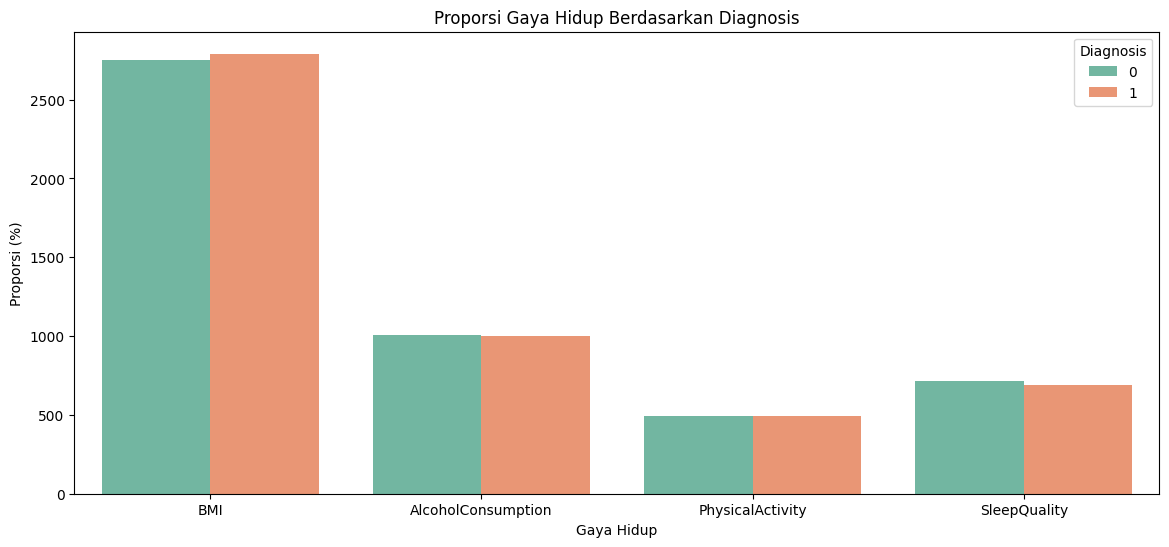

In [87]:
gh_melt = gh_freq.melt(
    id_vars='Diagnosis',
    value_vars=['BMI_%', 'AlcoholConsumption_%', 'PhysicalActivity_%', 'SleepQuality_%'],
    var_name='Gaya_Hidup',
    value_name='Proportion (%)'
)


gh_melt['Gaya_Hidup'] = gh_melt['Gaya_Hidup'].str.replace('_%', '')

plt.figure(figsize=(14,6))
sns.barplot(data=gh_melt, x='Gaya_Hidup', y='Proportion (%)', hue='Diagnosis', palette='Set2')
plt.title('Proporsi Gaya Hidup Berdasarkan Diagnosis')
plt.ylabel('Proporsi (%)')
plt.xlabel('Gaya Hidup')
plt.show()

In [88]:
cols_gh = ['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality']

chi_results = []

for i in cols_gh:
    table = pd.crosstab(df_eda[i], df_eda['Diagnosis'])

    # Lakukan uji Chi-square
    chi2, p, dof, expected = chi2_contingency(table)

    chi_results.append({
        'Variable': i,
        'Chi2': chi2,
        'p-value': p,
    })

chi_gh_df = pd.DataFrame(chi_results)

chi_gh_df['Signifikansi'] = chi_gh_df['p-value'].apply(lambda x: 'Signifikan' if x < 0.05 else 'Tidak Signifikan')

chi_gh_df



,Variable,Chi2,p-value,Signifikansi
0,BMI,2149.0,0.489858,Tidak Signifikan
1,AlcoholConsumption,2149.0,0.489858,Tidak Signifikan
2,PhysicalActivity,2149.0,0.489858,Tidak Signifikan
3,SleepQuality,2149.0,0.489858,Tidak Signifikan


Insight :

* Berdasarkan hasil analisis, BMI memiliki proporsi tertinggi diantara gaya hidup lain. Namun, selisih rata-rata BMI pada pasien Alzheimer dan Non-AD sangat kecil.

* Faktor gaya hidup lainnya menunjukkan proporsi yang cenderung mirip antara pasien Alzheimer dan non-AD

* Hasil uji chi-square menunjukkan bahwa tidak terdapat perbedaan signifikan pada semua faktor gaya hidup antara pasien Alzheimer dan non-AD.

* Jadi, tidak ada hubungan signifikan antara gaya hidup dengan diagnosa Alzheimer

#### Apakah Behavioral Problems dan Memory Complaints sering terjadi pada pasien Alzheimer?

In [89]:
freq = (
    df_eda.groupby('Diagnosis')[['BehavioralProblems', 'MemoryComplaints']]
    .sum()
    .reset_index()
)

# Hitung total pasien per Diagnosis
freq['total'] = df_eda.groupby('Diagnosis').size().values

# Hitung proporsi (%) tiap gejala
freq['BehavioralProblems_%'] = (freq['BehavioralProblems'] / freq['total']) * 100
freq['MemoryComplaints_%'] = (freq['MemoryComplaints'] / freq['total']) * 100


freq

,Diagnosis,BehavioralProblems,MemoryComplaints,total,BehavioralProblems_%,MemoryComplaints_%
0,0,134,161,1389,9.647228,11.591073
1,1,203,286,760,26.710526,37.631579


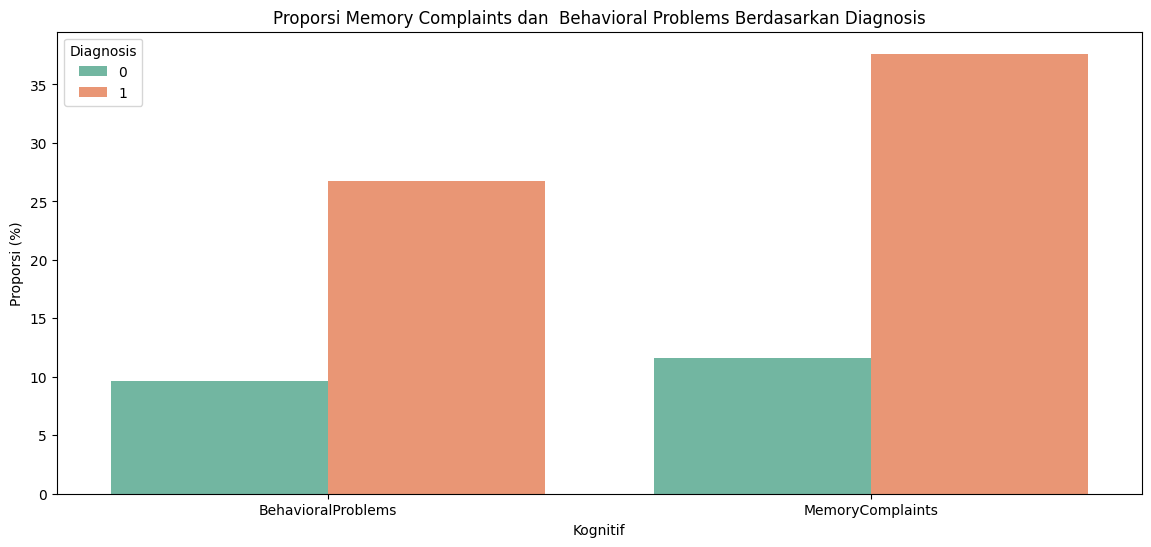

In [90]:
melt = freq.melt(
    id_vars='Diagnosis',
    value_vars=['BehavioralProblems_%', 'MemoryComplaints_%'],
    var_name='Kognitif',
    value_name='Proportion (%)'
)


melt['Kognitif'] = melt['Kognitif'].str.replace('_%', '')

plt.figure(figsize=(14,6))
sns.barplot(data=melt, x='Kognitif', y='Proportion (%)', hue='Diagnosis', palette='Set2')
plt.title('Proporsi Memory Complaints dan  Behavioral Problems Berdasarkan Diagnosis')
plt.ylabel('Proporsi (%)')
plt.xlabel('Kognitif')
plt.show()

In [122]:
columnkg = ['BehavioralProblems', 'MemoryComplaints']

chi_results = []

for i in columnkg:
    table = pd.crosstab(df_eda[i], df_eda['Diagnosis'])

    # Lakukan uji Chi-square
    chi2, p, dof, expected = chi2_contingency(table)

    chi_results.append({
        'Variable': i,
        'Chi2': chi2,
        'p-value': p,
    })

chi_df = pd.DataFrame(chi_results)

chi_df['Signifikansi'] = chi_df['p-value'].apply(lambda x: 'Signifikan' if x < 0.05 else 'Tidak Signifikan')

chi_df =  df_ttest.round(3)

chi_df



,Variable,t-statistic,p-value,Signifikansi
0,MMSE,12.025,0.0,Signifikan
1,ADL,16.546,0.0,Signifikan
2,FunctionalAssessment,18.552,0.0,Signifikan


* Pasien dengan keluhan memory complaints dan behavioral problems memiliki proporsi yang secara siginifikan lebih tinggi pada kelompok Alzheimer
* Hasil uji chi-square menunjukkan bahwa kedua variabel tersebut berhubungan signifikan dengan diagnosis Alzheimer (p-value < 0.05), menandakan bahwa gangguan memori dan perubahan perilaku merupakan indikator kognitif dan emosional penting dalam identifikasi Alzheimer.


###

In [92]:
df['Diagnosis'].value_counts(normalize=True)

,proportion
Diagnosis,
0,0.646347
1,0.353653


# Data preprocessing

In [93]:
df = df_eda.copy()

In [94]:
feature = df.drop(['Diagnosis'], axis=1)
target = df['Diagnosis']

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.30, random_state=42, shuffle=True)


## Cek multikoleniarity

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant


X = feature_train
X = add_constant(X)


vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Age,1.012231
2,Gender,1.013890
3,EducationLevel,1.011764
4,BMI,1.012671
5,AlcoholConsumption,1.012900
6,PhysicalActivity,1.011460
7,SleepQuality,1.012411
8,FamilyHistoryAlzheimers,1.008736
9,CardiovascularDisease,1.012202
10,Diabetes,1.010524


# Modelling

In [96]:
cols_to_scale = ['Age','EducationLevel','BMI', 'AlcoholConsumption','PhysicalActivity','SleepQuality','MMSE','FunctionalAssessment','ADL']

scaler = ColumnTransformer(
    transformers=[
        ('scale', MinMaxScaler(), cols_to_scale)
    ],
    remainder='passthrough'  # kolom lain tetap dipakai tanpa diubah
)

# Definisikan model-model
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42, probability=True, class_weight='balanced'),
    'MLP': MLPClassifier(random_state=1000, hidden_layer_sizes=(8,), solver='sgd')}

In [97]:
results = []

# Loop setiap model
for name, clf in classifiers.items():
    # Buat pipeline: scaling → model
    pipe = Pipeline([
        ('scaler', scaler),
        ('model', clf)
    ])

    # Fit model
    pipe.fit(feature_train, target_train)

    # Prediksi di train dan test
    y_pred_train = pipe.predict(feature_train)
    y_pred_test = pipe.predict(feature_test)

    # Probabilitas prediksi (untuk ROC AUC)
    y_pred_train_probs = pipe.predict_proba(feature_train)[:, 1]
    y_pred_test_probs = pipe.predict_proba(feature_test)[:, 1]

    # Evaluasi train
    precision_train = precision_score(target_train, y_pred_train, pos_label=1)
    recall_train = recall_score(target_train, y_pred_train, pos_label=1)
    f1_train = f1_score(target_train, y_pred_train, pos_label=1)
    roc_auc_train = roc_auc_score(target_train, y_pred_train_probs)

    # Evaluasi test
    precision_test = precision_score(target_test, y_pred_test, pos_label=1)
    recall_test = recall_score(target_test, y_pred_test, pos_label=1)
    f1_test = f1_score(target_test, y_pred_test, pos_label=1)
    roc_auc_test = roc_auc_score(target_test, y_pred_test_probs)

    # Simpan hasil
    results.append({
        'Model': name,
        'Precision (train)': precision_train,
        'Recall (train)': recall_train,
        'F1-Score (train)': f1_train,
        'ROC AUC (train)': roc_auc_train,
        'Precision (test)': precision_test,
        'Recall (test)': recall_test,
        'F1-Score (test)': f1_test,
        'ROC AUC (test)': roc_auc_test
    })

# Buat DataFrame hasil
results_df = pd.DataFrame(results)
results_df

[LightGBM] [Info] Number of positive: 516, number of negative: 988
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1846
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.343085 -> initscore=-0.649576
[LightGBM] [Info] Start training from score -0.649576


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



,Model,Precision (train),Recall (train),F1-Score (train),ROC AUC (train),Precision (test),Recall (test),F1-Score (test),ROC AUC (test)
0,Logistic Regression,0.731667,0.850775,0.786738,0.914682,0.718045,0.782787,0.749020,0.882660
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,0.866667,0.852459,0.859504,0.886329
2,Random Forest,1.000000,1.000000,1.000000,1.000000,0.946341,0.795082,0.864143,0.946016
3,XGBoost,1.000000,1.000000,1.000000,1.000000,0.946667,0.872951,0.908316,0.946037
4,LightGBM,1.000000,1.000000,1.000000,1.000000,0.951327,0.881148,0.914894,0.945444
5,KNN,0.838164,0.672481,0.746237,0.909803,0.685535,0.446721,0.540943,0.746714
6,SVM,0.843860,0.932171,0.885820,0.961958,0.738281,0.774590,0.756000,0.885021
7,MLP,0.838926,0.242248,0.375940,0.803261,0.780822,0.233607,0.359621,0.802747


## Light GBM

### Hyperparameter tuning

In [98]:
pipe = Pipeline([
    ('tuned_model', LGBMClassifier(random_state=42,is_unbalance=True))
])

param_grid = {
    'tuned_model__max_depth': [3, 5, 7, 10],
    'tuned_model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'tuned_model__n_estimators': [100, 200, 300, 495],
    'tuned_model__subsample': [0.6, 0.8, 1.0],
    'tuned_model__colsample_bytree': [0.6, 0.8, 1.0],
    'tuned_model__reg_alpha': [0, 0.1, 1],
    'tuned_model__reg_lambda': [0, 0.1, 1],
    'tuned_model__num_leaves': [15, 31, 63],
    'tuned_model__min_child_samples': [10, 20, 30],
    'tuned_model__boosting_type': ['gbdt', 'dart']
}

# Skema validasi silang
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search
random_search_lgbm = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv,
    scoring='recall',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model ke data training
random_search_lgbm.fit(feature_train, target_train)

# Cetak hasil terbaik
print("Best set of hyperparameters: ", random_search_lgbm.best_params_)
print("Best recall score: ", random_search_lgbm.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 516, number of negative: 988
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1847
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.343085 -> initscore=-0.649576
[LightGBM] [Info] Start training from score -0.649576
Best set of hyperparameters:  {'tuned_model__subsample': 0.6, 'tuned_model__reg_lambda': 0, 'tuned_model__reg_alpha': 1, 'tuned_model__num_leaves': 15, 'tuned_model__n_estimators': 100, 'tuned_model__min_child_samples': 10, 'tuned_model__max_depth': 7, 'tuned_model__learning_rate': 0.1, 'tuned_model__colsample_bytree': 1.0, 'tuned_model__boosting_type': 'dart'}
Best recall score:  0

In [99]:
# Ambil model terbaik dari hasil hypertuning
tuned_lgbm = random_search_lgbm.best_estimator_

# Prediksi pada data train
tuned_lgbm_pred_train = tuned_lgbm.predict(feature_train)
tuned_lgbm_pred_train_probs = tuned_lgbm.predict_proba(feature_train)[:, 1]

# Prediksi pada data test
tuned_lgbm_pred_test = tuned_lgbm.predict(feature_test)
tuned_lgbm_pred_test_probs = tuned_lgbm.predict_proba(feature_test)[:, 1]

# Evaluasi metrik untuk data train
tuned_train_lgbm_metrics = {
    'Precision': precision_score(target_train, tuned_lgbm_pred_train, pos_label=1),
    'Recall': recall_score(target_train, tuned_lgbm_pred_train, pos_label=1),
    'F1-Score': f1_score(target_train, tuned_lgbm_pred_train, pos_label=1),
    'ROC AUC': roc_auc_score(target_train, tuned_lgbm_pred_train_probs)
}

# Evaluasi metrik untuk data test
tuned_test_lgbm_metrics = {
    'Precision': precision_score(target_test, tuned_lgbm_pred_test, pos_label=1),
    'Recall': recall_score(target_test, tuned_lgbm_pred_test, pos_label=1),
    'F1-Score': f1_score(target_test, tuned_lgbm_pred_test, pos_label=1),
    'ROC AUC': roc_auc_score(target_test, tuned_lgbm_pred_test_probs)
}

# Buat DataFrame evaluasi
tuned_lgbm_evaluation_df = pd.DataFrame([tuned_train_lgbm_metrics, tuned_test_lgbm_metrics], index=['Train', 'Test'])

# Tampilkan hasil evaluasi
tuned_lgbm_evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Train,0.952756,0.937984,0.945312,0.993252
Test,0.948718,0.909836,0.928870,0.946512


### Hyperparameter tuning with smoteenn

In [100]:
from imblearn.combine import SMOTEENN
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
# from imblearn.under_sampling import RandomUnderSampler

pipe = Pipeline([
    ('scaler', ColumnTransformer([
        ('scale', MinMaxScaler(), cols_to_scale)
    ], remainder='passthrough')),
    ('sampling', None),
    ('model', LGBMClassifier(random_state=42))
])

param_grid = {
    'sampling': [None, SMOTEENN(random_state=42)],
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__n_estimators': [100, 200, 300, 495],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__reg_alpha': [0, 0.1, 1],
    'model__reg_lambda': [0, 0.1, 1],
    'model__num_leaves': [15, 31, 63]
}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv,
    scoring='recall',
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search.fit(feature_train, target_train)

# Results
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best recall score: ", random_search.best_score_)

[LightGBM] [Info] Number of positive: 675, number of negative: 440
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2258
[LightGBM] [Info] Number of data points in the train set: 1115, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.605381 -> initscore=0.427938
[LightGBM] [Info] Start training from score 0.427938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [101]:
# Retrieve model
tuned_model_lgbm_imb = random_search.best_estimator_

# Predict
pred_lgbm_imb_train = tuned_model_lgbm_imb.predict(feature_train)
pred_lgbm_imb_train_probs = tuned_model_lgbm_imb.predict_proba(feature_train)[:, 1]
pred_lgbm_imb_test = tuned_model_lgbm_imb.predict(feature_test)
pred_lgbm_imb_test_probs = tuned_model_lgbm_imb.predict_proba(feature_test)[:, 1]

# Evaluate
lgbm_imb_train_metrics = {
    'Precision': precision_score(target_train, pred_lgbm_imb_train),
    'Recall': recall_score(target_train, pred_lgbm_imb_train),
    'F1-Score': f1_score(target_train, pred_lgbm_imb_train),
    'ROC AUC': roc_auc_score(target_train, pred_lgbm_imb_train_probs)
}

lgbm_imb_test_metrics = {
    'Precision': precision_score(target_test, pred_lgbm_imb_test),
    'Recall': recall_score(target_test, pred_lgbm_imb_test),
    'F1-Score': f1_score(target_test, pred_lgbm_imb_test),
    'ROC AUC': roc_auc_score(target_test, pred_lgbm_imb_test_probs)
}

# DataFrame hasil evaluasi
tuned_lgbm_evaluation_df = pd.DataFrame([lgbm_imb_train_metrics, lgbm_imb_test_metrics], index=['Train', 'Test'])
tuned_lgbm_evaluation_df

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



,Precision,Recall,F1-Score,ROC AUC
Train,0.811130,0.932171,0.867448,0.959905
Test,0.792982,0.926230,0.854442,0.933435


## XG-Bost

#### Hyperparameter Tuning

In [102]:
pipe = Pipeline([
    ('tuned_modelxg', XGBClassifier(random_state=42, eval_metric='logloss'))
])

param_grid = {
    'tuned_modelxg__max_depth': [3, 6, 10],
    'tuned_modelxg__learning_rate': [0.01, 0.1, 0.2],
    'tuned_modelxg__n_estimators': [100, 200, 300],
    'tuned_modelxg__subsample': [0.7, 0.8, 1.0],
    'tuned_modelxg__gamma': [0, 0.1, 0.2],
    'tuned_modelxg__reg_alpha': [0, 0.1, 1],
    'tuned_modelxg__reg_lambda': [0, 0.1, 1]
}

# Skema validasi silang
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search
random_search_xgb = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv,
    scoring='recall',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model ke data training
random_search_xgb.fit(feature_train, target_train)

# Cetak hasil terbaik
print("Best set of hyperparameters: ", random_search_xgb.best_params_)
print("Best recall score: ", random_search_xgb.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best set of hyperparameters:  {'tuned_modelxg__subsample': 1.0, 'tuned_modelxg__reg_lambda': 0.1, 'tuned_modelxg__reg_alpha': 1, 'tuned_modelxg__n_estimators': 100, 'tuned_modelxg__max_depth': 3, 'tuned_modelxg__learning_rate': 0.2, 'tuned_modelxg__gamma': 0.1}
Best recall score:  0.9068707991038089


In [103]:
# Ambil model terbaik dari hasil hypertuning
tuned_xgb = random_search_xgb.best_estimator_

# Prediksi pada data train
tuned_xgb_pred_train = tuned_xgb.predict(feature_train)
tuned_xgb_pred_train_probs = tuned_xgb.predict_proba(feature_train)[:, 1]

# Prediksi pada data test
tuned_xgb_pred_test = tuned_xgb.predict(feature_test)
tuned_xgb_pred_test_probs = tuned_xgb.predict_proba(feature_test)[:, 1]

# Evaluasi metrik untuk data train
tuned_train_xgb_metrics = {
    'Precision': precision_score(target_train, tuned_xgb_pred_train, pos_label=1),
    'Recall': recall_score(target_train, tuned_xgb_pred_train, pos_label=1),
    'F1-Score': f1_score(target_train, tuned_xgb_pred_train, pos_label=1),
    'ROC AUC': roc_auc_score(target_train, tuned_xgb_pred_train_probs)
}

# Evaluasi metrik untuk data test
tuned_test_xgb_metrics = {
    'Precision': precision_score(target_test, tuned_xgb_pred_test, pos_label=1),
    'Recall': recall_score(target_test, tuned_xgb_pred_test, pos_label=1),
    'F1-Score': f1_score(target_test, tuned_xgb_pred_test, pos_label=1),
    'ROC AUC': roc_auc_score(target_test, tuned_xgb_pred_test_probs)
}

# Buat DataFrame evaluasi
tuned_xgb_evaluation_df = pd.DataFrame([tuned_train_xgb_metrics, tuned_test_xgb_metrics], index=['Train', 'Test'])

# Tampilkan hasil evaluasi
tuned_xgb_evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Train,0.972112,0.945736,0.958743,0.995226
Test,0.943966,0.897541,0.920168,0.944432


#### Hyperparameter tuning with handling imbalanced data

In [104]:
from imblearn.combine import SMOTEENN
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
# from imblearn.under_sampling import RandomUnderSampler

pipe = Pipeline([
    ('scaler', ColumnTransformer([
        ('scale', MinMaxScaler(), cols_to_scale)
    ], remainder='passthrough')),
    ('sampling', None),
    ('model', XGBClassifier(random_state=42))
])

param_grid = {
    'sampling': [None, SMOTEENN(random_state=42)],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__n_estimators': [100, 200, 300],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__gamma': [0, 0.1, 0.2],
    'model__reg_alpha': [0, 0.1, 1],
    'model__reg_lambda': [0, 0.1, 1]
}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search_xgb = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv,
    scoring='recall',
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search_xgb.fit(feature_train, target_train)

# Results
print("Best set of hyperparameters: ", random_search_xgb.best_params_)
print("Best recall score: ", random_search_xgb.best_score_)

Best set of hyperparameters:  {'sampling': SMOTEENN(random_state=42), 'model__subsample': 0.8, 'model__reg_lambda': 0, 'model__reg_alpha': 0, 'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.01, 'model__gamma': 0.2}
Best recall score:  0.9456870799103809


In [105]:
#retrieve model
tuned_model_xgb_imb = random_search_xgb.best_estimator_

#predict on train and test
tuned_pred_imb_train = tuned_model_xgb_imb.predict(feature_train)
tuned_pred_imb_train_probs = tuned_model_xgb_imb.predict_proba(feature_train)[:, 1]

tuned_pred_imb_test = tuned_model_xgb_imb.predict(feature_test)
tuned_pred_imb_test_probs = tuned_model_xgb_imb.predict_proba(feature_test)[:, 1]

#evaluate
tuned_train_imb_xgb_metrics = {
    'Precision': precision_score(target_train, tuned_pred_imb_train, pos_label=1),
    'Recall': recall_score(target_train, tuned_pred_imb_train, pos_label=1),
    'F1-Score': f1_score(target_train, tuned_pred_imb_train, pos_label=1),
    'ROC AUC': roc_auc_score(target_train, tuned_pred_imb_train_probs)
}

tuned_test_imb_xgb_metrics = {
    'Precision': precision_score(target_test, tuned_pred_imb_test, pos_label=1),
    'Recall': recall_score(target_test, tuned_pred_imb_test, pos_label=1),
    'F1-Score': f1_score(target_test, tuned_pred_imb_test, pos_label=1),
    'ROC AUC': roc_auc_score(target_test, tuned_pred_imb_test_probs)
}

tuned_evaluation_df = pd.DataFrame([tuned_train_imb_xgb_metrics, tuned_test_imb_xgb_metrics], index=['Train', 'Test'])
tuned_evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Train,0.715758,0.94186,0.813389,0.940373
Test,0.738562,0.92623,0.821818,0.919464


# Evaluation Model

In [106]:
evaluation_df = pd.DataFrame([tuned_train_lgbm_metrics, tuned_test_lgbm_metrics,
                             lgbm_imb_train_metrics, lgbm_imb_test_metrics],
                             index = ['Hyperparameter Tuning LighGBM (Train)', 'Hyperparameter Tuning LighGBM (Test)',
                                      'Hyperparameter Tuning LighGBM menggunakan SMOTEENN (Train)', 'Hyperparameter Tuning LighGBM menggunakan SMOTEENN (Test)'])
evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Hyperparameter Tuning LighGBM (Train),0.952756,0.937984,0.945312,0.993252
Hyperparameter Tuning LighGBM (Test),0.948718,0.909836,0.928870,0.946512
Hyperparameter Tuning LighGBM menggunakan SMOTEENN (Train),0.811130,0.932171,0.867448,0.959905
Hyperparameter Tuning LighGBM menggunakan SMOTEENN (Test),0.792982,0.926230,0.854442,0.933435


In [107]:
evaluation_df_xg = pd.DataFrame([tuned_train_xgb_metrics, tuned_test_xgb_metrics,
                                 tuned_train_imb_xgb_metrics, tuned_test_imb_xgb_metrics],
                             index = [
                                      'Hyperparameter Tuning XG-Boost (Train)', 'Hyperparameter Tuning XG-Boost (Test)',
                                      'Hyperparameter Tuning XG-Boost menggunakan SMOTEENN (Train)', 'Hyperparameter Tuning XG-Boost menggunakan SMOTEENN (Test)'])
evaluation_df_xg

,Precision,Recall,F1-Score,ROC AUC
Hyperparameter Tuning XG-Boost (Train),0.972112,0.945736,0.958743,0.995226
Hyperparameter Tuning XG-Boost (Test),0.943966,0.897541,0.920168,0.944432
Hyperparameter Tuning XG-Boost menggunakan SMOTEENN (Train),0.715758,0.941860,0.813389,0.940373
Hyperparameter Tuning XG-Boost menggunakan SMOTEENN (Test),0.738562,0.926230,0.821818,0.919464


<Figure size 800x600 with 0 Axes>

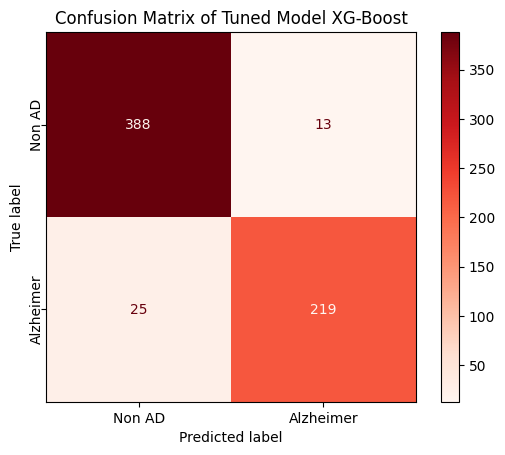

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix untuk model LightGBM yang sudah di-tune
cm_XGBoost = confusion_matrix(target_test, tuned_xgb_pred_test)

# Tampilkan confusion matrix
XGBoost_display = ConfusionMatrixDisplay(confusion_matrix=cm_XGBoost,
                                      display_labels=['Non AD', 'Alzheimer'])

plt.figure(figsize=(8, 6))
XGBoost_display.plot(cmap='Reds', values_format='d')
plt.yticks(rotation=90, ha='center', va='center')
plt.title('Confusion Matrix of Tuned Model XG-Boost')
plt.show()

<Figure size 800x600 with 0 Axes>

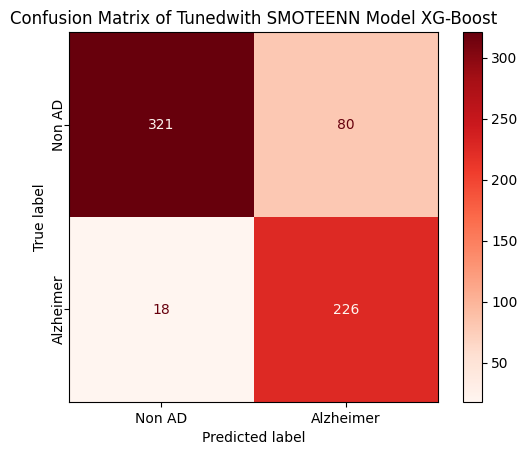

In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix untuk model LightGBM yang sudah di-tune
cm_XGBoost = confusion_matrix(target_test, tuned_pred_imb_test)

# Tampilkan confusion matrix
XGBoost_display = ConfusionMatrixDisplay(confusion_matrix=cm_XGBoost,
                                      display_labels=['Non AD', 'Alzheimer'])

plt.figure(figsize=(8, 6))
XGBoost_display.plot(cmap='Reds', values_format='d')
plt.yticks(rotation=90, ha='center', va='center')
plt.title('Confusion Matrix of Tunedwith SMOTEENN Model XG-Boost')
plt.show()

<Figure size 800x600 with 0 Axes>

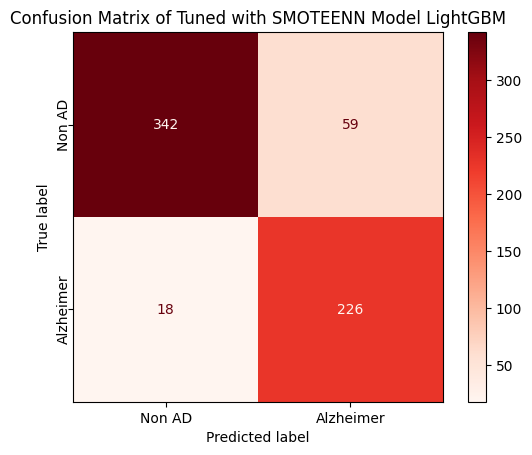

In [110]:
# Confusion matrix untuk model LightGBM yang sudah di-tune
cm_LightGBM = confusion_matrix(target_test, pred_lgbm_imb_test)

# Tampilkan confusion matrix
LightGBM_display = ConfusionMatrixDisplay(confusion_matrix=cm_LightGBM,
                                      display_labels=['Non AD', 'Alzheimer'])

plt.figure(figsize=(8, 6))
LightGBM_display.plot(cmap='Reds', values_format='d')
plt.yticks(rotation=90, ha='center', va='center')
plt.title('Confusion Matrix of Tuned with SMOTEENN Model LightGBM')
plt.show()

<Figure size 800x600 with 0 Axes>

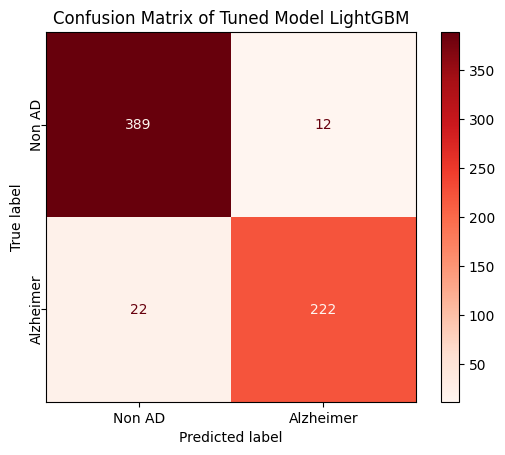

In [111]:
# Confusion matrix untuk model LightGBM yang sudah di-tune
cm_LightGBM = confusion_matrix(target_test, tuned_lgbm_pred_test )

# Tampilkan confusion matrix
LightGBM_display = ConfusionMatrixDisplay(confusion_matrix=cm_LightGBM,
                                      display_labels=['Non AD', 'Alzheimer'])

plt.figure(figsize=(8, 6))
LightGBM_display.plot(cmap='Reds', values_format='d')
plt.yticks(rotation=90, ha='center', va='center')
plt.title('Confusion Matrix of Tuned Model LightGBM')
plt.show()

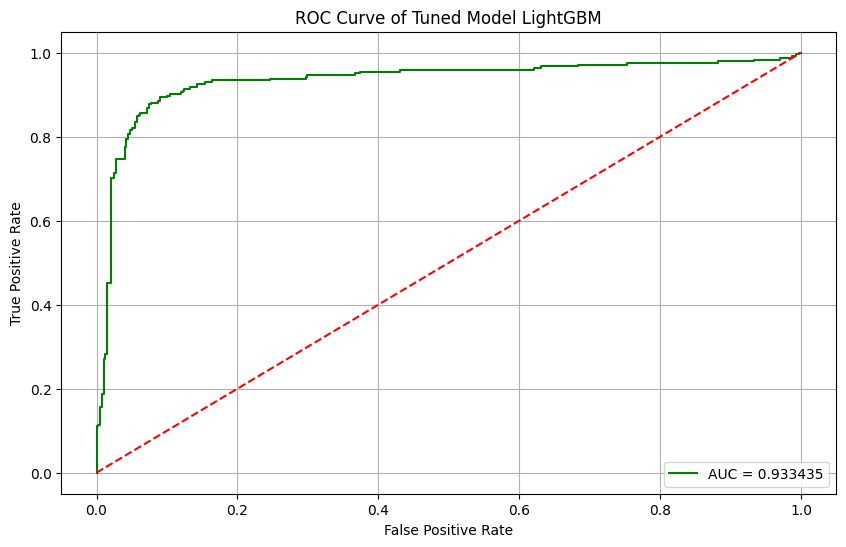

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score

# Hitung ROC curve dan AUC untuk model LightGBM
LightGBM_fpr, LightGBM_tpr, LightGBM_thresholds = roc_curve(target_test, pred_lgbm_imb_test_probs)
LightGBM_roc_auc = roc_auc_score(target_test, pred_lgbm_imb_test_probs)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(LightGBM_fpr, LightGBM_tpr, color='green', label=f'AUC = {LightGBM_roc_auc:.6f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve of Tuned Model LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

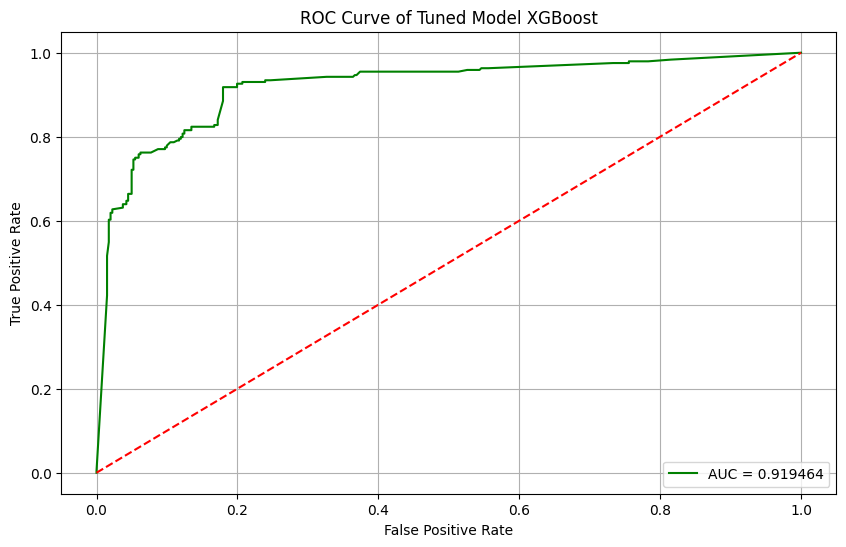

In [113]:
from sklearn.metrics import roc_curve, roc_auc_score

# Hitung ROC curve dan AUC untuk model XGBoost
XGBoost_fpr, XGBoost_tpr, XGBoost_thresholds = roc_curve(target_test, tuned_pred_imb_test_probs)
XGBoost_roc_auc = roc_auc_score(target_test, tuned_pred_imb_test_probs)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(XGBoost_fpr, XGBoost_tpr, color='green', label=f'AUC = {XGBoost_roc_auc:.6f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve of Tuned Model XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Feature Importance

In [114]:
import dalex as dx

LightGBM_exp = dx.Explainer(
    tuned_model_lgbm_imb,
    feature_train,
    target_train,
    label="LightGBM Interpretation"
)

Preparation of a new explainer is initiated

  -> data              : 1504 rows 22 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1504 values
  -> model_class       : lightgbm.sklearn.LGBMClassifier (default)
  -> label             : LightGBM Interpretation
  -> predict function  : <function yhat_proba_default at 0x7d31487385e0> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0278, mean = 0.426, max = 0.98
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.956, mean = -0.0825, max = 0.967
  -> model_info        : package imblearn

A new explainer has been created!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



In [115]:
LightGBM_exp.model_parts().plot()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, 

In [116]:
LightGBM_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[60.  60.3 60.6 ... 89.4 89.7 90. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

Calculating ceteris paribus:   5%|▍         | 1/22 [00:00<00:06,  3.14it/s]/usr/local/lib/python3.12/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.01 0.02 ... 0.98 0.99 1.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


In [117]:
XGBOOST_exp = dx.Explainer(
    tuned_model_xgb_imb,
    feature_train,
    target_train,
    label="XGBOOST Interpretation"
)

Preparation of a new explainer is initiated

  -> data              : 1504 rows 22 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1504 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBOOST Interpretation
  -> predict function  : <function yhat_proba_default at 0x7d31487385e0> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.23, mean = 0.501, max = 0.849
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.849, mean = -0.158, max = 0.77
  -> model_info        : package imblearn

A new explainer has been created!


In [118]:
XGBOOST_exp.model_parts().plot()

In [119]:
XGBOOST_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[60.  60.3 60.6 ... 89.4 89.7 90. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.12/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.01 0.02 ... 0.98 0.99 1.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:   9%|▉         | 2/22 [00:00<00:01, 18.44it/s]/usr/local/lib/python3.12/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will

# Sitasi


@misc{rabie_el_kharoua_2024,

title={Alzheimer's Disease Dataset},

url={https://www.kaggle.com/dsv/8668279},

DOI={10.34740/KAGGLE/DSV/8668279},

publisher={Kaggle},

author={Rabie El Kharoua},

year={2024} }